In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('covid_19_india.csv')

print("Packages imported & dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
display(data.head())


Packages imported & dataset loaded successfully!
Dataset shape: (18110, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\python\Covid-19 project\covid_19_india.csv')
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
data.describe()


,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [5]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
data.isnull().sum()


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\4130628072.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


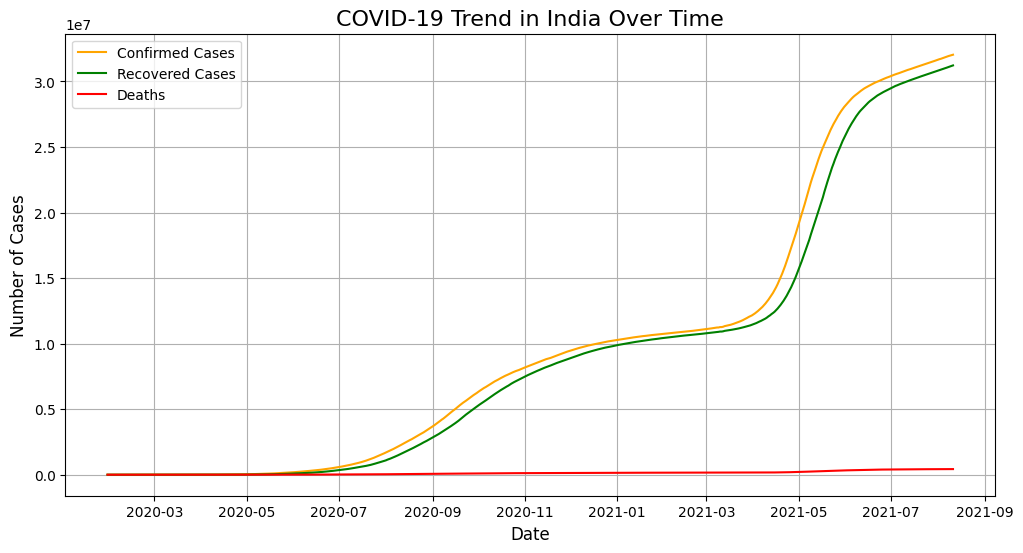

In [9]:
india_trend = data.groupby('Date')[['Confirmed', 'Cured', 'Deaths']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(india_trend['Date'], india_trend['Confirmed'], label='Confirmed Cases', color='orange')
plt.plot(india_trend['Date'], india_trend['Cured'], label='Recovered Cases', color='green')
plt.plot(india_trend['Date'], india_trend['Deaths'], label='Deaths', color='red')

plt.title('COVID-19 Trend in India Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [10]:
data['Date'].max()


Timestamp('2021-08-11 00:00:00')

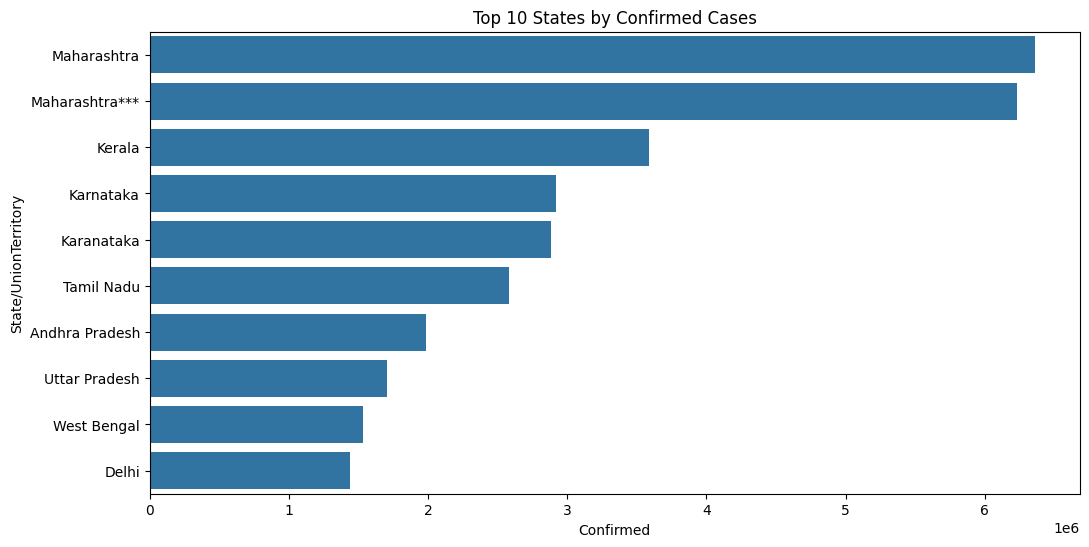

In [11]:
statewise = data.groupby('State/UnionTerritory').max()[['Confirmed', 'Deaths', 'Cured']]
statewise = statewise.sort_values(by='Confirmed', ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y='State/UnionTerritory', data=statewise.head(10))
plt.title('Top 10 States by Confirmed Cases')
plt.show()

In [12]:
data['State/UnionTerritory'] = data['State/UnionTerritory'].str.strip()


In [13]:
data['State/UnionTerritory'] = data['State/UnionTerritory'].replace({
    'Maharashtra***': 'Maharashtra',
    'Karanataka': 'Karnataka'
})

In [14]:
import re

# Standardize names
data['State/UnionTerritory'] = (
    data['State/UnionTerritory']
    .str.strip()                                 # remove leading/trailing spaces
    .str.replace(r'\*+', '', regex=True)         # remove any number of asterisks
    .str.title()                                 # convert to Title Case (Kerala, Tamil Nadu)
)

# Optional: fix known typos manually
corrections = {
    'Karanataka': 'Karnataka',
    'Telengana': 'Telangana',
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands'
}
data['State/UnionTerritory'] = data['State/UnionTerritory'].replace(corrections)

# Check unique names after cleaning
print(sorted(data['State/UnionTerritory'].unique()))


['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Cases Being Reassigned To States', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli', 'Dadra And Nagar Haveli And Daman And Diu', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Himanchal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [15]:
# Group by state and take the last available data entry for each (most recent numbers)
latest_data = (
    data.sort_values('Date')
        .groupby('State/UnionTerritory')
        .tail(1)
        .sort_values(by='Confirmed', ascending=False)
)

# Keep only important columns
latest_data = latest_data[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths']]

print(latest_data)


                           State/UnionTerritory  Confirmed    Cured  Deaths
18094                               Maharashtra    6363442  6159676  134201
18090                                    Kerala    3586693  3396184   18004
18089                                 Karnataka    2921049  2861499   36848
18104                                Tamil Nadu    2579130  2524400   34367
18075                            Andhra Pradesh    1985182  1952736   13564
18108                             Uttar Pradesh    1708812  1685492   22775
18109                               West Bengal    1534999  1506532   18252
18082                                     Delhi    1436852  1411280   25068
18080                              Chhattisgarh    1003356   988189   13544
18099                                    Odisha     988997   972710    6565
18102                                 Rajasthan     953851   944700    8954
18084                                   Gujarat     825085   814802   10077
18093       

C:\Users\hp\AppData\Local\Temp\ipykernel_5288\3405676363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_data.sort_values('Confirmed', ascending=False),


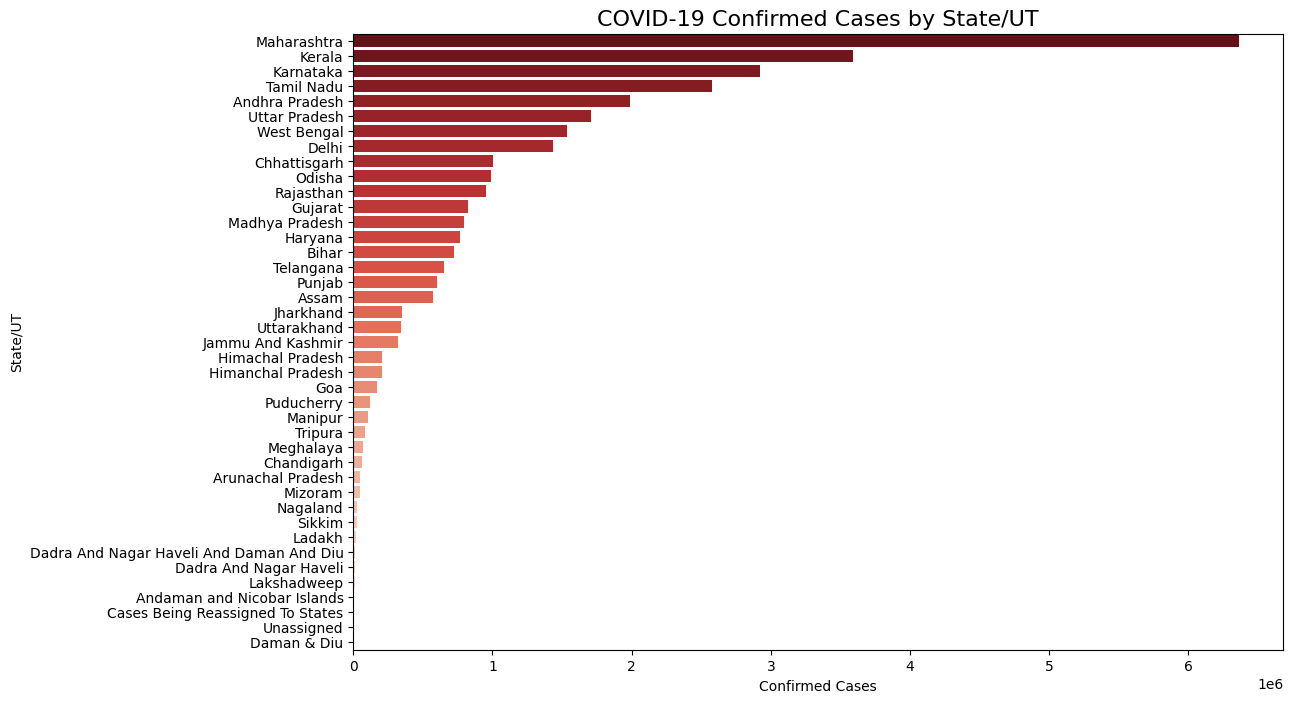

In [16]:
# Bar chart for all states by confirmed cases
plt.figure(figsize=(12,8))
sns.barplot(data=latest_data.sort_values('Confirmed', ascending=False),
            x='Confirmed', y='State/UnionTerritory', palette='Reds_r')
plt.title('COVID-19 Confirmed Cases by State/UT', fontsize=16)
plt.xlabel('Confirmed Cases')
plt.ylabel('State/UT')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\2369582261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


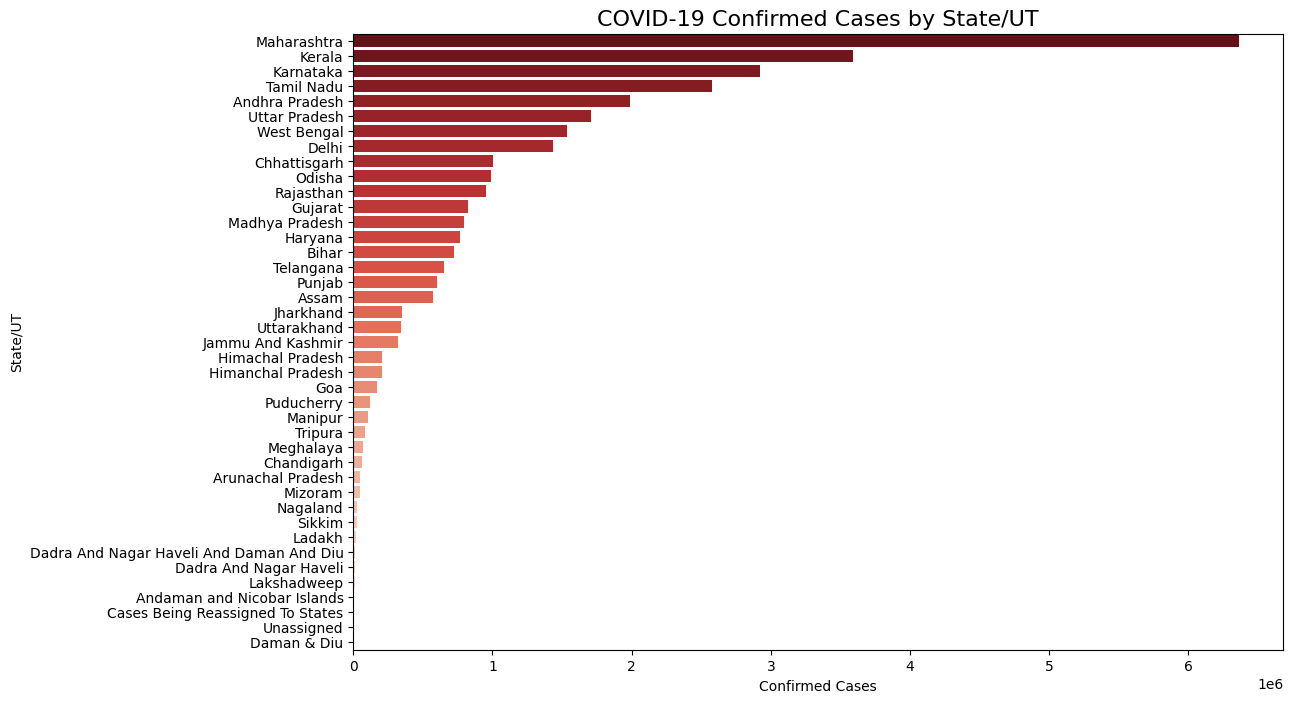

In [17]:
# Bar chart for all states by confirmed cases
plt.figure(figsize=(12,8))
sns.barplot(
    data=latest_data.sort_values('Confirmed', ascending=False),
    x='Confirmed',
    y='State/UnionTerritory',
    palette='Reds_r'
)
plt.title('COVID-19 Confirmed Cases by State/UT', fontsize=16)
plt.xlabel('Confirmed Cases')
plt.ylabel('State/UT')
plt.show()


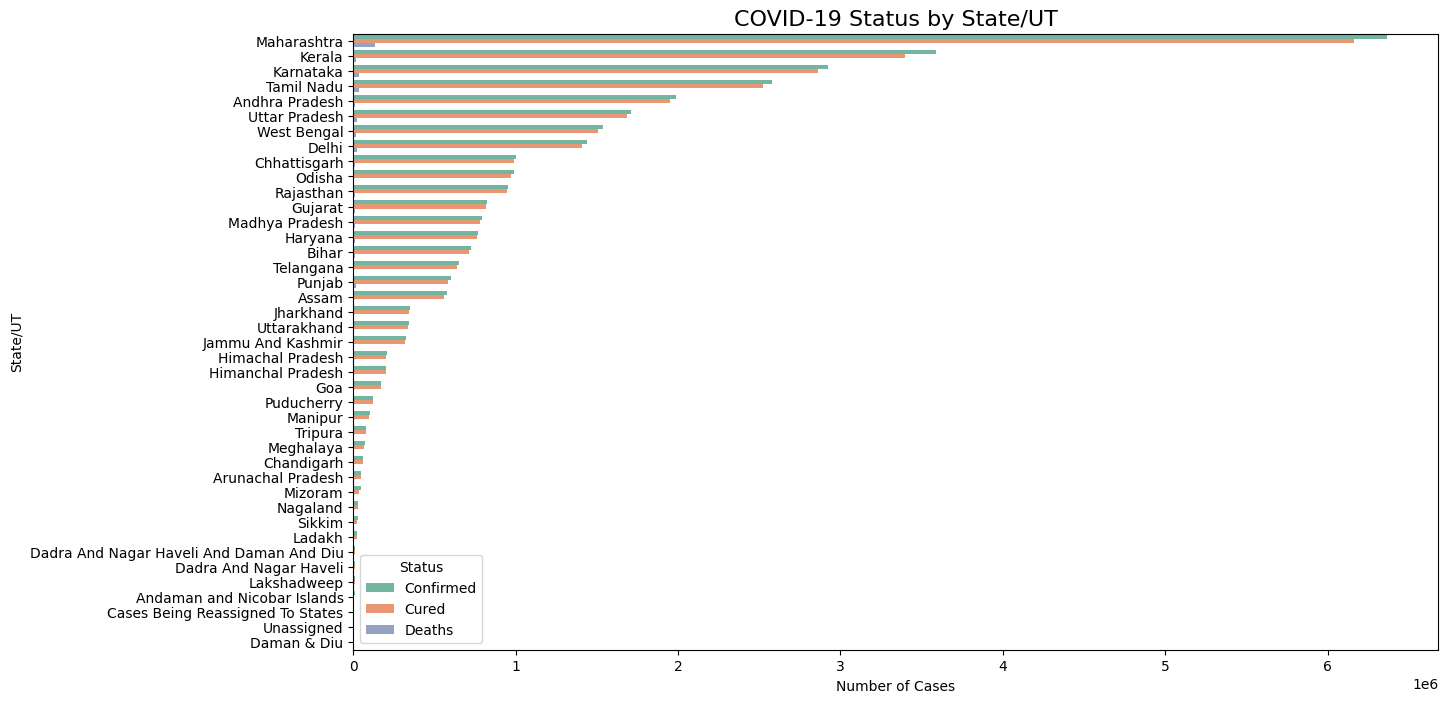

In [18]:
# Prepare data for grouped bar chart
melted_data = latest_data.melt(
    id_vars='State/UnionTerritory',
    value_vars=['Confirmed', 'Cured', 'Deaths'],
    var_name='Status',
    value_name='Count'
)

plt.figure(figsize=(14,8))
sns.barplot(
    data=melted_data.sort_values('Count', ascending=False),
    x='Count',
    y='State/UnionTerritory',
    hue='Status',
    palette='Set2'
)
plt.title('COVID-19 Status by State/UT', fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('State/UT')
plt.legend(title='Status')
plt.show()


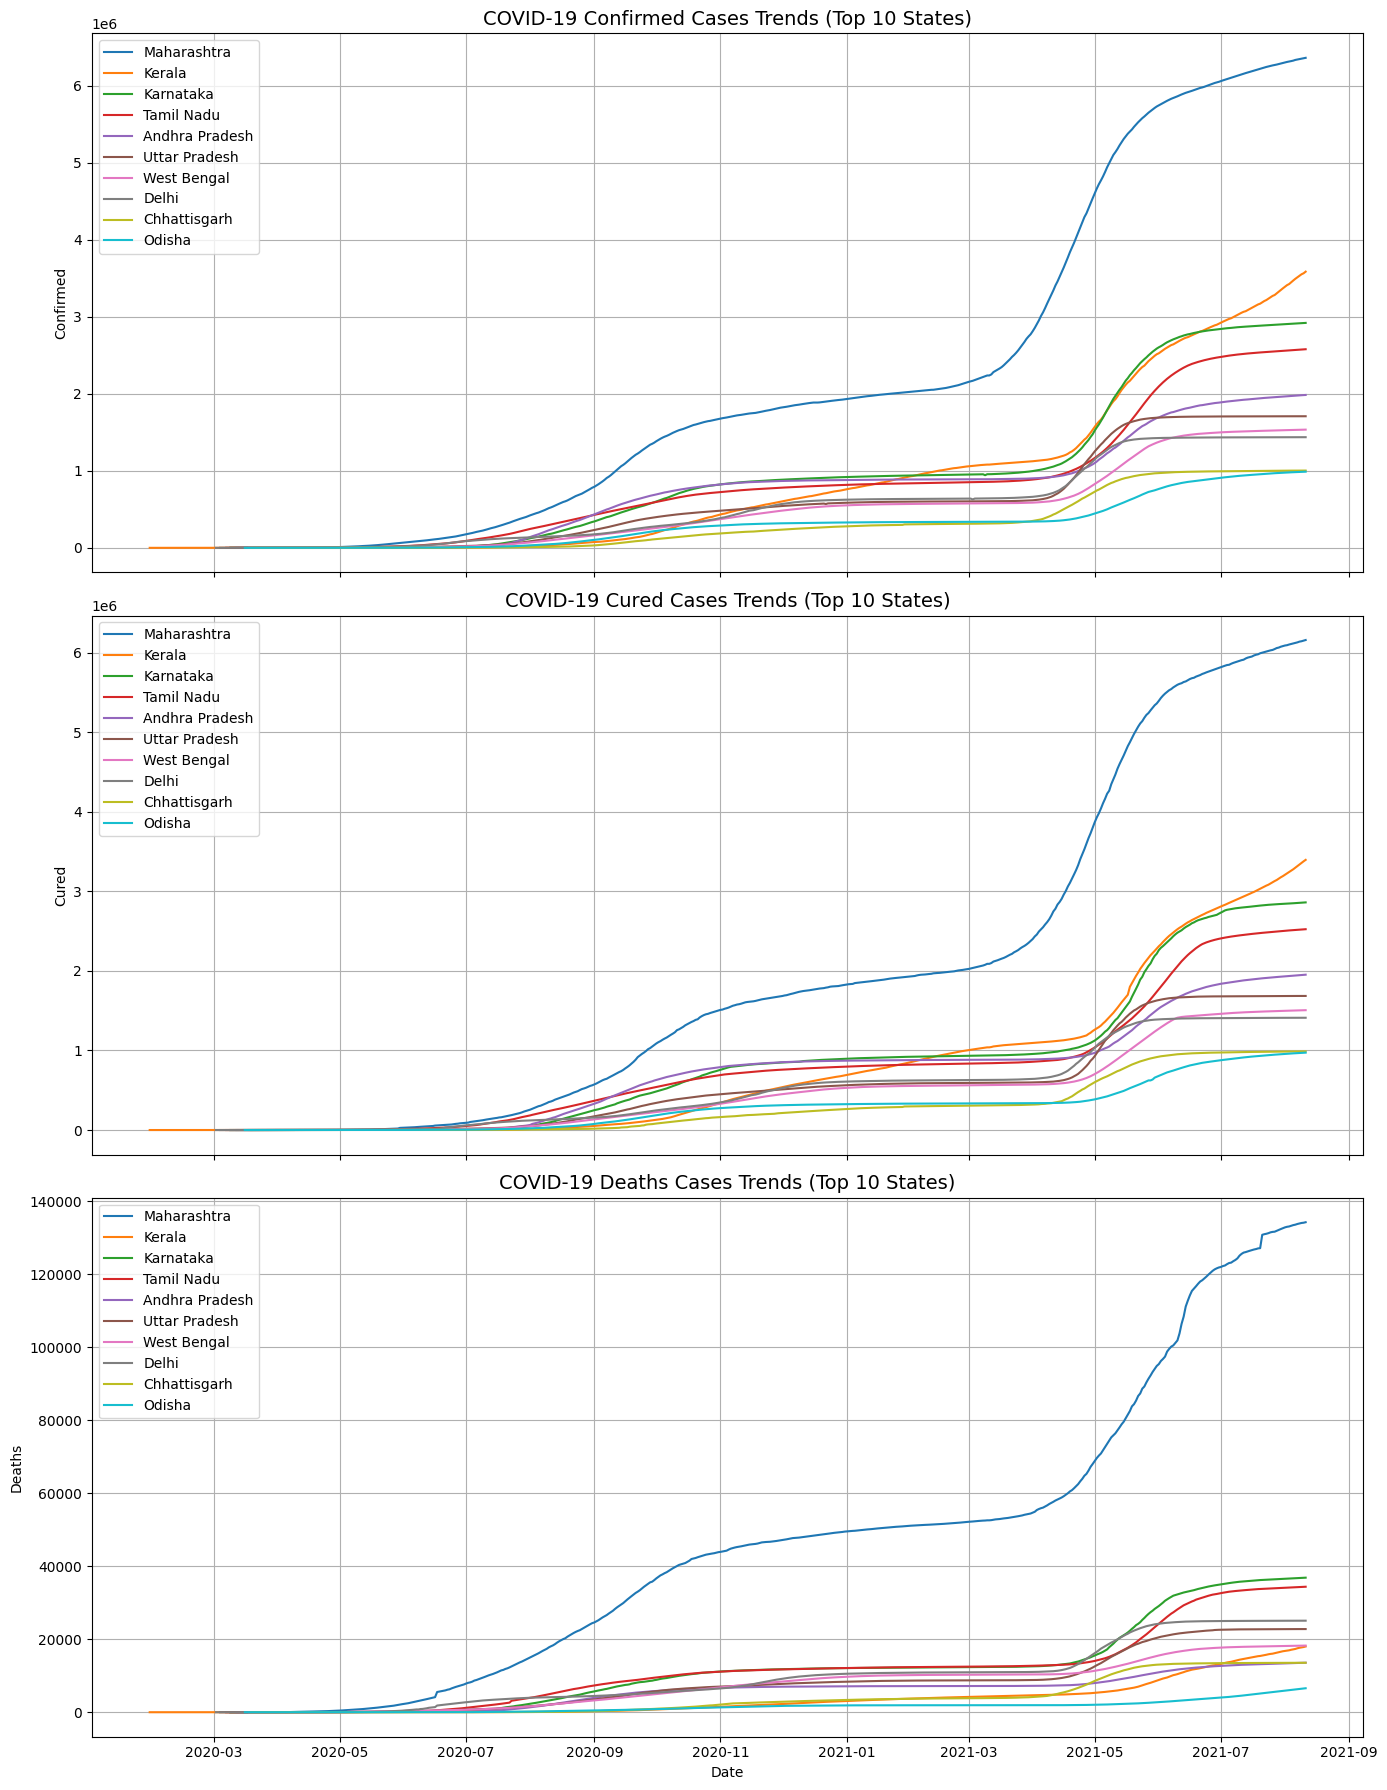

In [19]:
import matplotlib.pyplot as plt

# Get top 10 states by total confirmed cases
top_10_states = (
    data.groupby('State/UnionTerritory')['Confirmed']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

metrics = ['Confirmed', 'Cured', 'Deaths']
colors = ['tab:red', 'tab:green', 'tab:blue']

for ax, metric, color in zip(axes, metrics, colors):
    for state in top_10_states:
        state_trend = (
            data[data['State/UnionTerritory'] == state]
            .groupby('Date')[metric]
            .sum()
            .reset_index()
        )
        ax.plot(state_trend['Date'], state_trend[metric], label=state)

    ax.set_title(f'COVID-19 {metric} Cases Trends (Top 10 States)', fontsize=14)
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


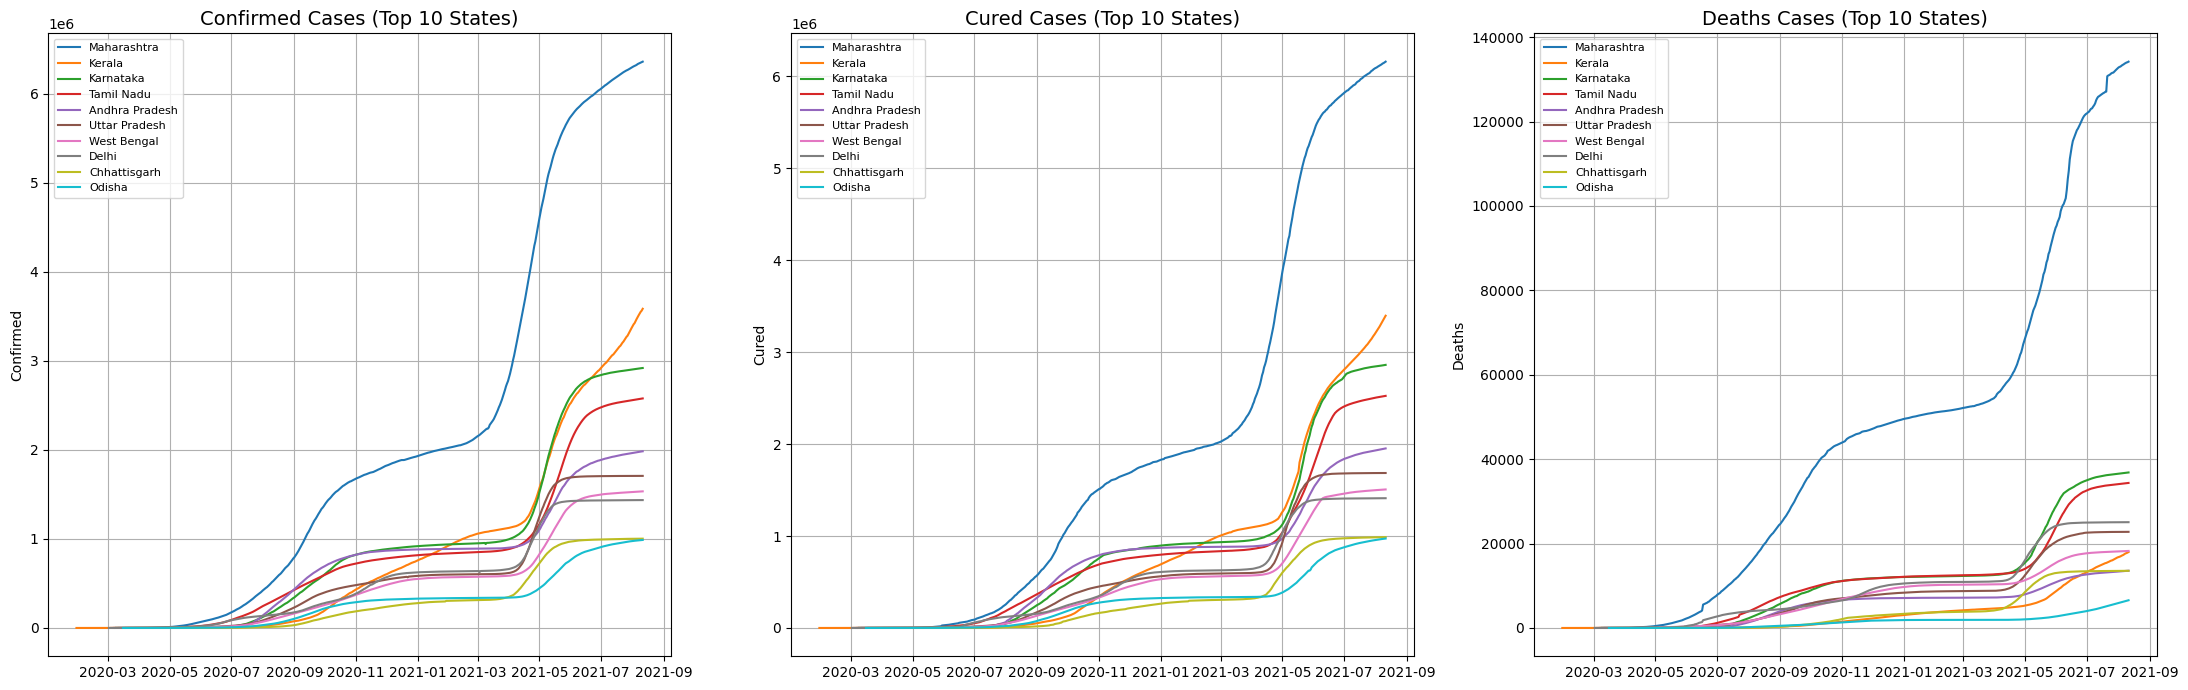

In [20]:
import matplotlib.pyplot as plt

# Get top 10 states by total confirmed cases
top_10_states = (
    data.groupby('State/UnionTerritory')['Confirmed']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=False)

metrics = ['Confirmed', 'Cured', 'Deaths']
colors = ['tab:red', 'tab:green', 'tab:blue']

for ax, metric, color in zip(axes, metrics, colors):
    for state in top_10_states:
        state_trend = (
            data[data['State/UnionTerritory'] == state]
            .groupby('Date')[metric]
            .sum()
            .reset_index()
        )
        ax.plot(state_trend['Date'], state_trend[metric], label=state)

    ax.set_title(f'{metric} Cases (Top 10 States)', fontsize=14)
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


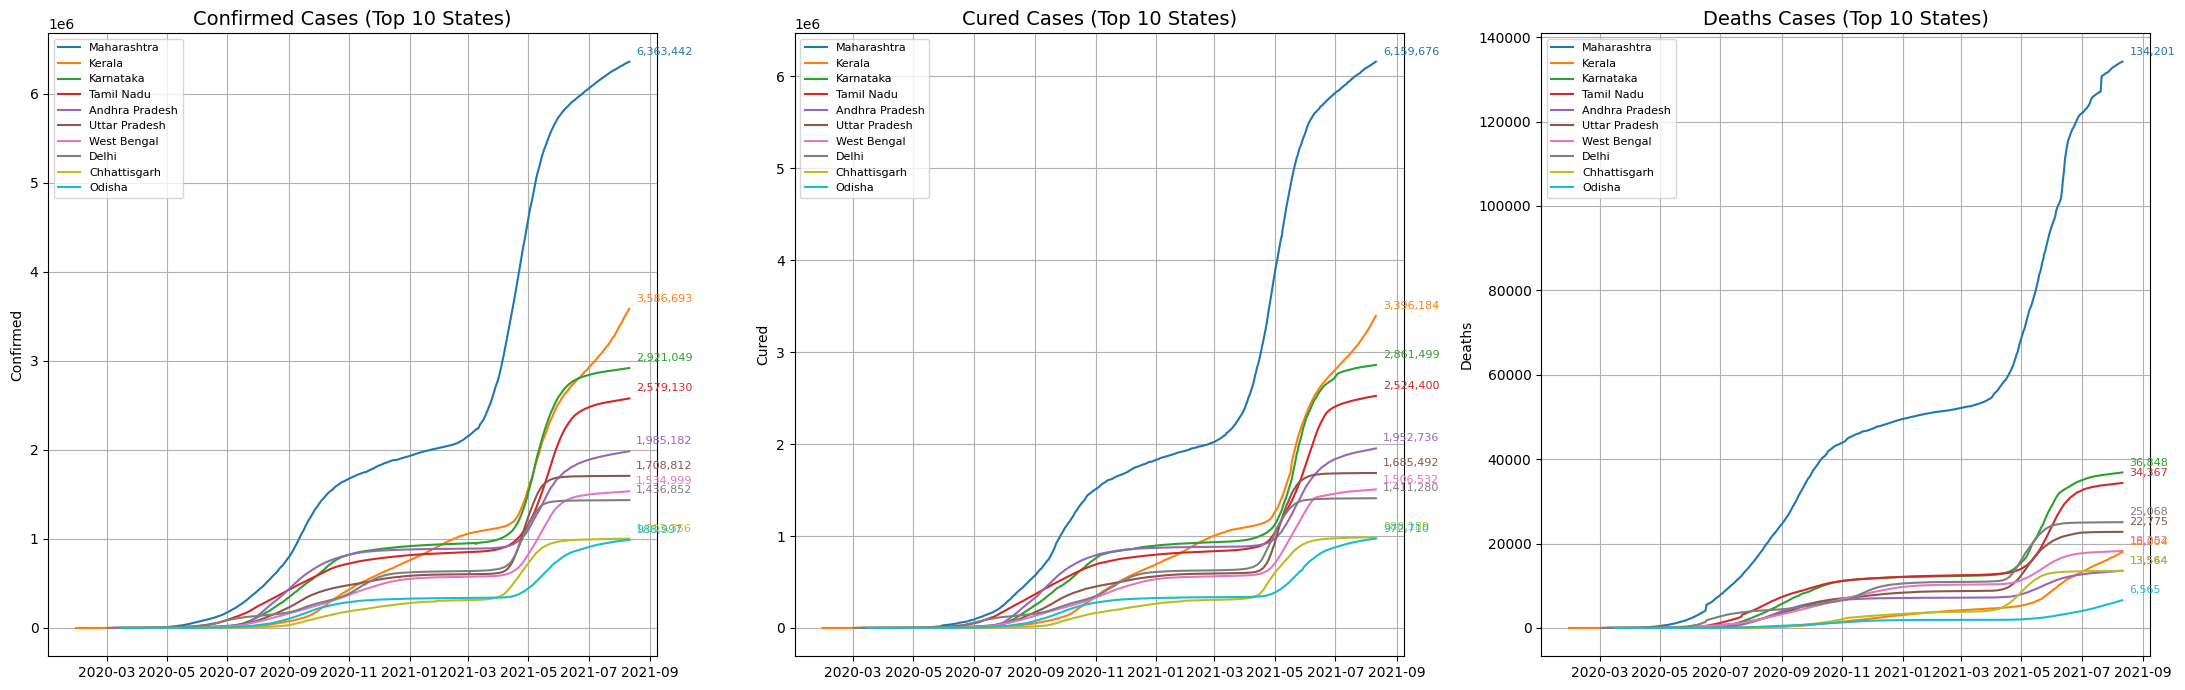

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 states by total confirmed cases
top_10_states = (
    data.groupby('State/UnionTerritory')['Confirmed']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Create a unique color palette for 10 states
palette = sns.color_palette("tab10", len(top_10_states))

fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=False)

metrics = ['Confirmed', 'Cured', 'Deaths']

for ax, metric in zip(axes, metrics):
    for state, color in zip(top_10_states, palette):
        state_trend = (
            data[data['State/UnionTerritory'] == state]
            .groupby('Date')[metric]
            .sum()
            .reset_index()
        )
        ax.plot(state_trend['Date'], state_trend[metric], label=state, color=color)

        # Find peak date & value
        peak_idx = state_trend[metric].idxmax()
        peak_date = state_trend.loc[peak_idx, 'Date']
        peak_value = state_trend.loc[peak_idx, metric]

        # Annotate peak
        ax.annotate(
            f"{peak_value:,}",
            xy=(peak_date, peak_value),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=8,
            color=color
        )

    ax.set_title(f'{metric} Cases (Top 10 States)', fontsize=14)
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


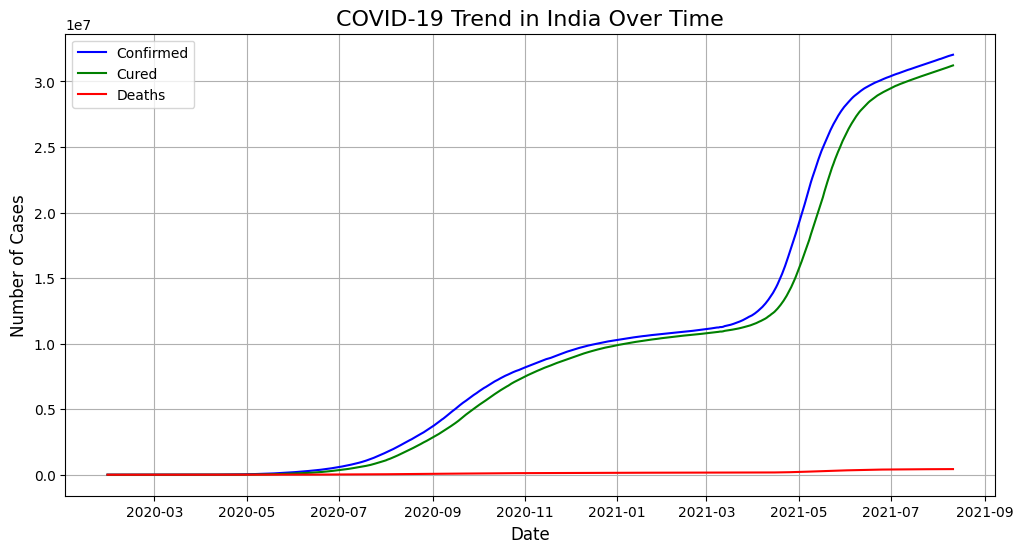

In [22]:
import matplotlib.pyplot as plt

# Group data by date
india_trend = data.groupby('Date')[['Confirmed', 'Cured', 'Deaths']].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(india_trend['Date'], india_trend['Confirmed'], label='Confirmed', color='blue')
plt.plot(india_trend['Date'], india_trend['Cured'], label='Cured', color='green')
plt.plot(india_trend['Date'], india_trend['Deaths'], label='Deaths', color='red')

plt.title('COVID-19 Trend in India Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


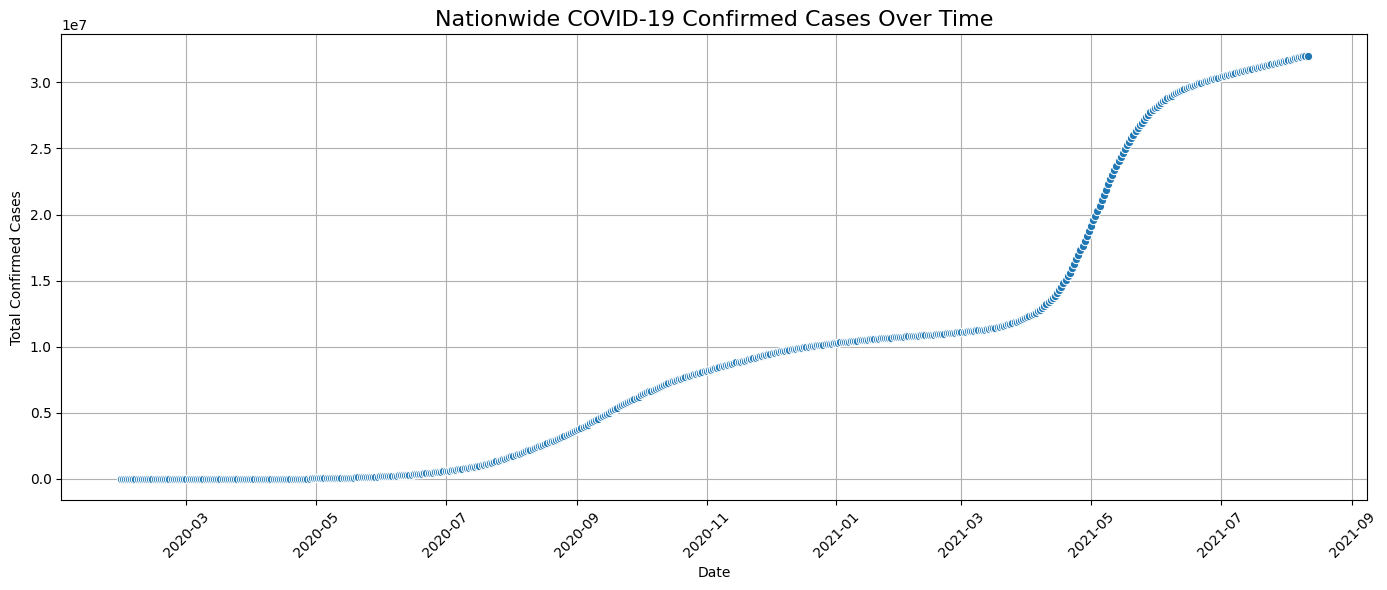

In [23]:
# Group by date and sum confirmed cases for all states
daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()

# Plot time trend
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Confirmed', data=daily_cases, marker='o')
plt.title('Nationwide COVID-19 Confirmed Cases Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


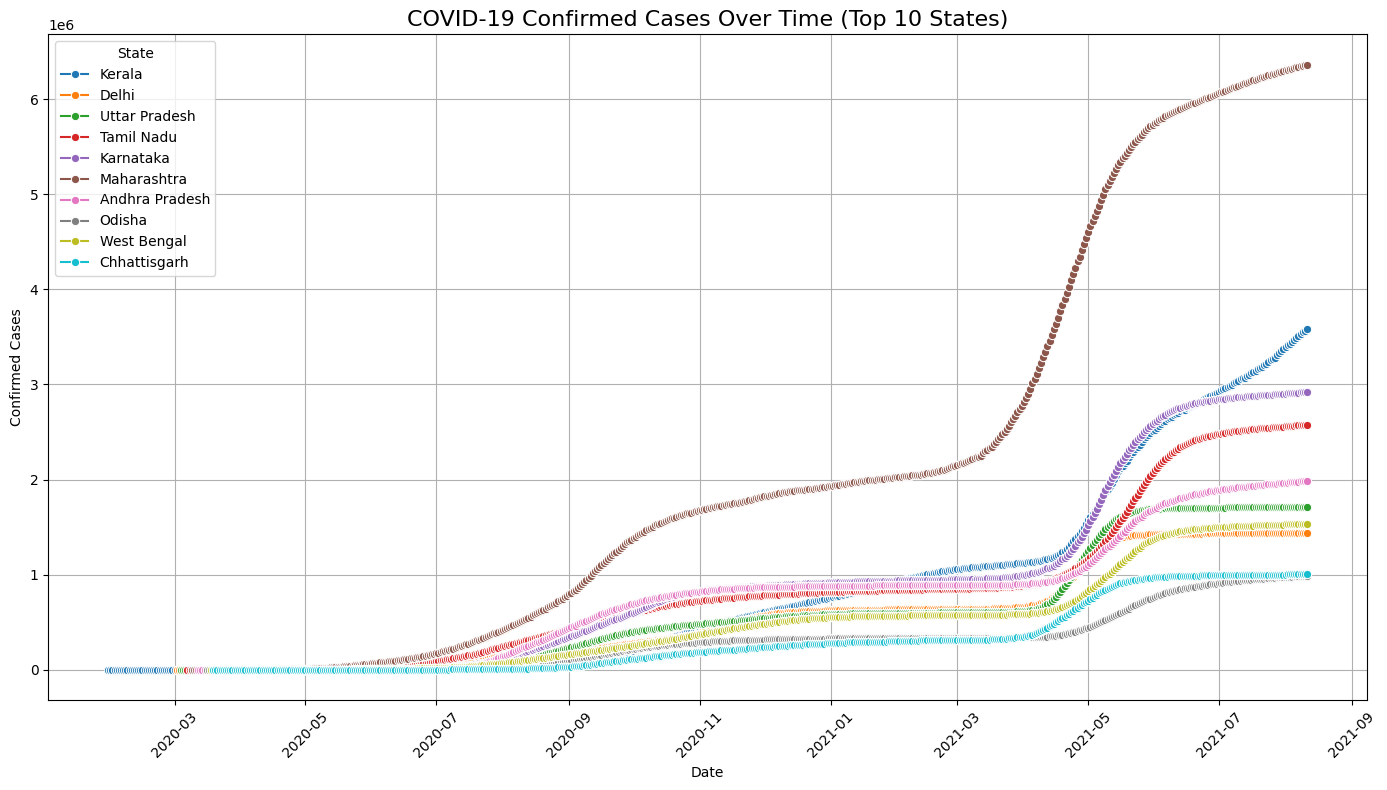

In [24]:
# Find top 10 states by total confirmed cases
top10_states = (
    data.groupby('State/UnionTerritory')['Confirmed']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter only top 10 states
top10_data = data[data['State/UnionTerritory'].isin(top10_states)]

# Plot time trends for top 10 states
plt.figure(figsize=(14,8))
sns.lineplot(
    x='Date',
    y='Confirmed',
    hue='State/UnionTerritory',
    data=top10_data,
    marker='o'
)
plt.title('COVID-19 Confirmed Cases Over Time (Top 10 States)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='State', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\2170612931.py:24: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


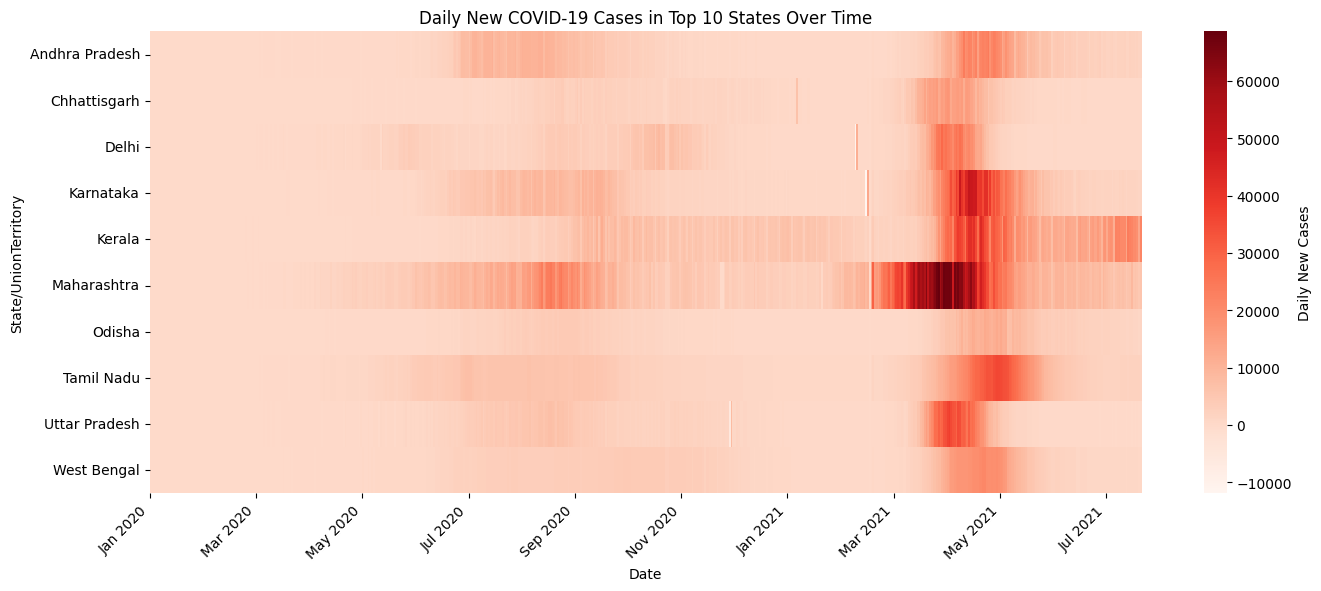

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load dataset
df = pd.read_csv("covid_19_india.csv")

# Clean state names
df['State/UnionTerritory'] = (
    df['State/UnionTerritory']
    .str.strip()
    .str.replace(r'\*+', '', regex=True)
    .str.title()
)
corrections = {
    'Karanataka': 'Karnataka',
    'Telengana': 'Telangana',
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands'
}
df['State/UnionTerritory'] = df['State/UnionTerritory'].replace(corrections)

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort and calculate daily new cases
df_sorted = df.sort_values(['State/UnionTerritory', 'Date'])
df_sorted['Daily_New_Cases'] = (
    df_sorted.groupby('State/UnionTerritory')['Confirmed'].diff().fillna(0)
)

# Top 10 states
top_states = (
    df_sorted.groupby('State/UnionTerritory')['Confirmed']
    .max()
    .nlargest(10)
    .index
)
df_top = df_sorted[df_sorted['State/UnionTerritory'].isin(top_states)]

# Pivot for heatmap
heatmap_data = df_top.pivot_table(
    index='State/UnionTerritory',
    columns='Date',
    values='Daily_New_Cases',
    fill_value=0
)

# Plot
plt.figure(figsize=(16, 6))
ax = sns.heatmap(heatmap_data, cmap='Reds', cbar_kws={'label': 'Daily New Cases'})
plt.title('Daily New COVID-19 Cases in Top 10 States Over Time')
plt.xlabel('Date')
plt.ylabel('State/UnionTerritory')

# Format x-axis ticks (show every 2 months)
ax.set_xticks(range(0, len(heatmap_data.columns), 60))
ax.set_xticklabels(
    [d.strftime('%b %Y') for d in heatmap_data.columns[::60]],
    rotation=45,
    ha='right'
)

plt.show()



In [26]:
import pandas as pd

# Load raw data
df_raw = pd.read_csv("covid_19_india.csv")

# 1. Parse Date correctly (dayfirst = True for Indian format)
df_raw['Date'] = pd.to_datetime(df_raw['Date'], dayfirst=True, errors='coerce')

# 2. Drop only rows where Date is NaT
df_clean = df_raw.dropna(subset=['Date'])

# 3. Ensure numeric columns are numeric
for col in ['Cured', 'Deaths', 'Confirmed']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 4. Save cleaned file
df_clean.to_csv("covid_19_india_cleaned.csv", index=False)

print(f"✅ Cleaned file saved with {len(df_clean)} rows")


✅ Cleaned file saved with 18110 rows


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\1765431951.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_raw['Date'] = pd.to_datetime(df_raw['Date'], dayfirst=True, errors='coerce')


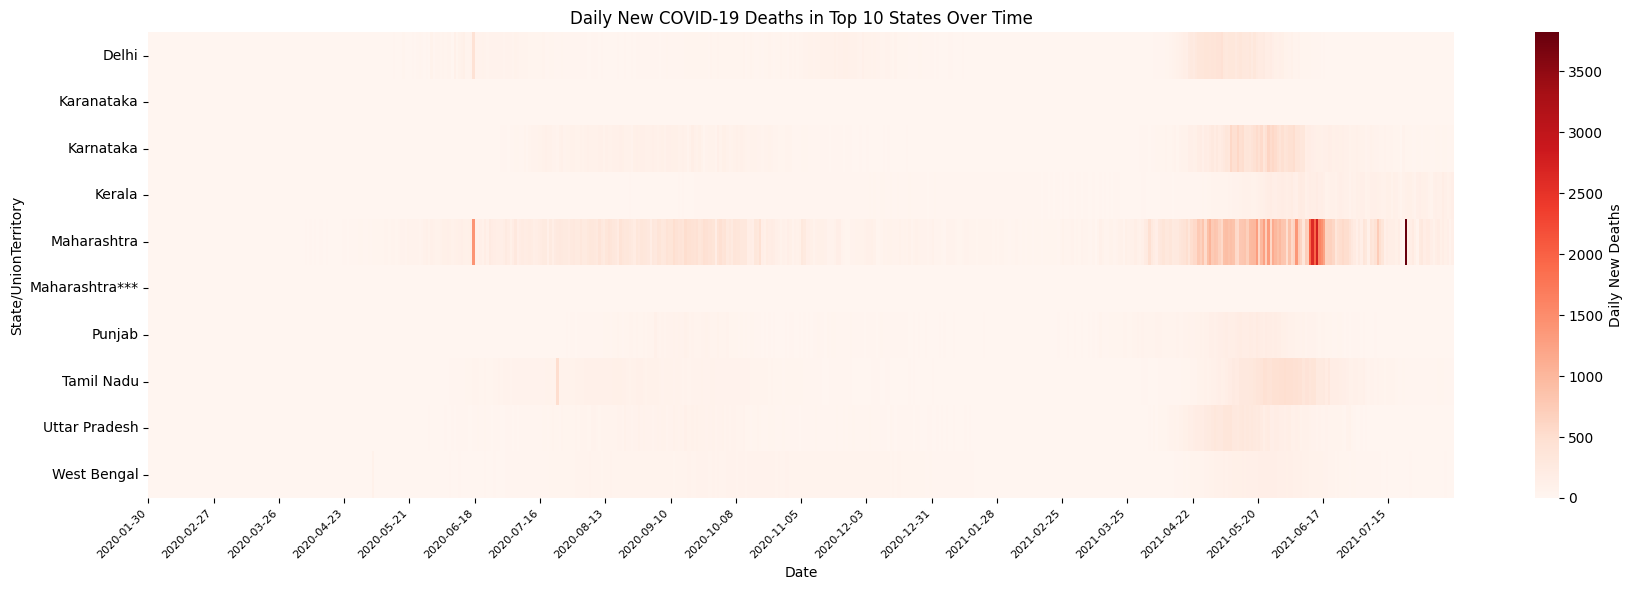

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned CSV
df = pd.read_csv("covid_19_india_cleaned.csv")

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort values
df = df.sort_values(['State/UnionTerritory', 'Date'])

# Calculate daily new deaths
df['Daily_New_Deaths'] = df.groupby('State/UnionTerritory')['Deaths'].diff().fillna(0)

# Filter top 10 states by total deaths
top_10_states = df.groupby('State/UnionTerritory')['Deaths'].max().nlargest(10).index
df_top10 = df[df['State/UnionTerritory'].isin(top_10_states)]

# Pivot for heatmap
pivot_df = df_top10.pivot_table(index='State/UnionTerritory', 
                                 columns='Date', 
                                 values='Daily_New_Deaths', 
                                 fill_value=0)

# Plot heatmap
plt.figure(figsize=(18, 6))
ax = sns.heatmap(pivot_df, cmap="Reds", cbar_kws={'label': 'Daily New Deaths'})

# Format x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.xticks(ticks=range(0, len(pivot_df.columns), max(1, len(pivot_df.columns)//20)), 
           labels=[pivot_df.columns[i].strftime('%Y-%m-%d') 
                   for i in range(0, len(pivot_df.columns), max(1, len(pivot_df.columns)//20))])

plt.title("Daily New COVID-19 Deaths in Top 10 States Over Time")
plt.xlabel("Date")
plt.ylabel("State/UnionTerritory")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\3218706959.py:18: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


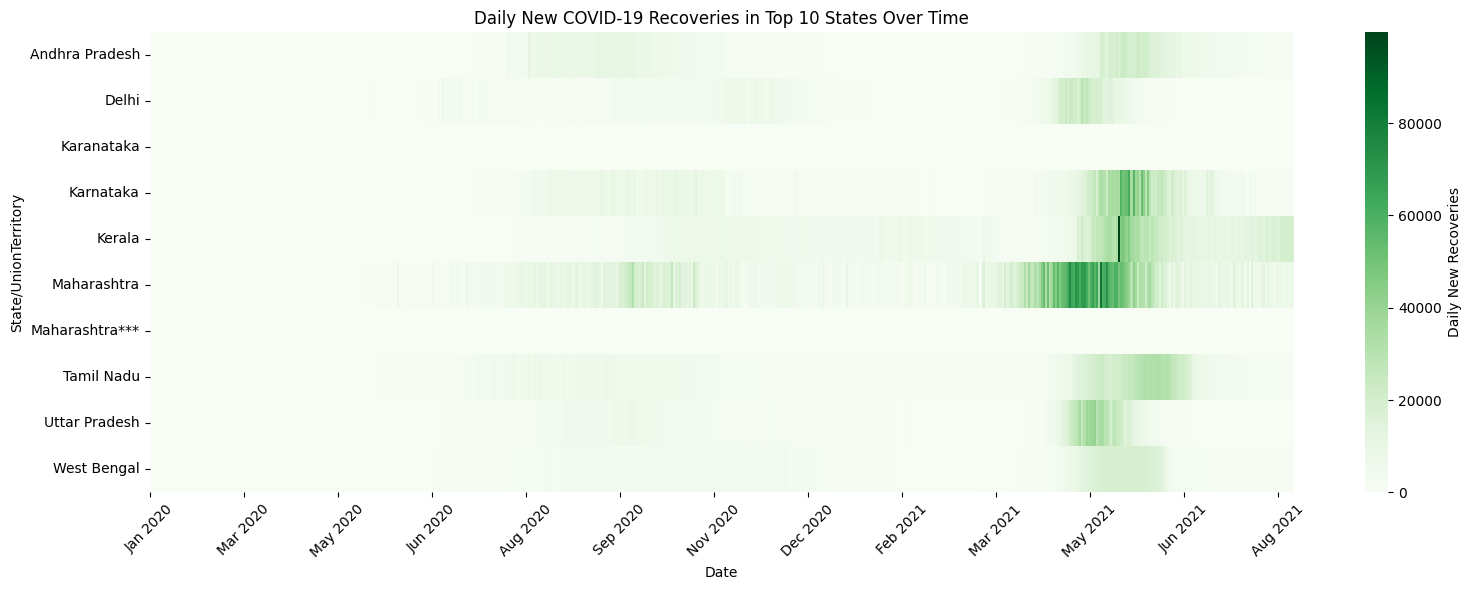

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# -------------------
# 1. Load & Clean Data
# -------------------
df = pd.read_csv("covid_19_india.csv")

# Standardize column names
df.columns = df.columns.str.strip()

# Clean state names
df['State/UnionTerritory'] = df['State/UnionTerritory'].str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Remove rows with invalid/missing dates
df = df.dropna(subset=['Date'])

# Sort by State and Date
df = df.sort_values(['State/UnionTerritory', 'Date'])

# Remove duplicates for same state-date
df = df.drop_duplicates(subset=['State/UnionTerritory', 'Date'], keep='last')

# Reset index
df_clean = df.reset_index(drop=True)

# --------------------------
# 2. Prepare Recovery Data
# --------------------------
# Calculate daily new recoveries per state
df_clean['Daily_New_Recoveries'] = (
    df_clean.groupby('State/UnionTerritory')['Cured']
    .diff()
    .fillna(0)
)

# Get top 10 states by total recoveries
top_states_recovery = (
    df_clean.groupby('State/UnionTerritory')['Cured']
    .max()
    .nlargest(10)
    .index
)

# Filter only top states
df_top_recovery = df_clean[df_clean['State/UnionTerritory'].isin(top_states_recovery)]

# Pivot for heatmap
heatmap_recovery = df_top_recovery.pivot_table(
    index='State/UnionTerritory',
    columns='Date',
    values='Daily_New_Recoveries',
    fill_value=0
)

# --------------------------
# 3. Plot Recovery Heatmap
# --------------------------
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_recovery, cmap='Greens', cbar_kws={'label': 'Daily New Recoveries'})

plt.title('Daily New COVID-19 Recoveries in Top 10 States Over Time')
plt.xlabel('Date')
plt.ylabel('State/UnionTerritory')

# Format x-axis dates
# Format x-axis dates
plt.xticks(
    ticks=range(0, len(heatmap_recovery.columns), max(1, len(heatmap_recovery.columns)//12)),
    labels=[d.strftime('%b %Y') for d in heatmap_recovery.columns[::max(1, len(heatmap_recovery.columns)//12)]],
    rotation=45
)


plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("covid_19_india_cleaned.csv")

# Avoid division errors
df["CFR"] = (df["Deaths"] / df["Confirmed"]) * 100
df["RecoveryRate"] = (df["Cured"] / df["Confirmed"]) * 100

# Handle infinities and NaNs
df["CFR"] = df["CFR"].replace([float("inf"), -float("inf")], 0).fillna(0)
df["RecoveryRate"] = df["RecoveryRate"].replace([float("inf"), -float("inf")], 0).fillna(0)

# Save updated dataset
df.to_csv("covid_19_india_cleaned_rates.csv", index=False)

print("CFR and Recovery Rate added & file saved as covid_19_india_cleaned_rates.csv")
print(df[["Date", "State/UnionTerritory", "Confirmed", "Cured", "Deaths", "CFR", "RecoveryRate"]].head())


CFR and Recovery Rate added & file saved as covid_19_india_cleaned_rates.csv
         Date State/UnionTerritory  Confirmed  Cured  Deaths  CFR  \
0  2020-01-30               Kerala          1      0       0  0.0   
1  2020-01-31               Kerala          1      0       0  0.0   
2  2020-02-01               Kerala          2      0       0  0.0   
3  2020-02-02               Kerala          3      0       0  0.0   
4  2020-02-03               Kerala          3      0       0  0.0   

   RecoveryRate  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\1654588795.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_cfr.values, y=state_cfr.index, palette="Reds_r")


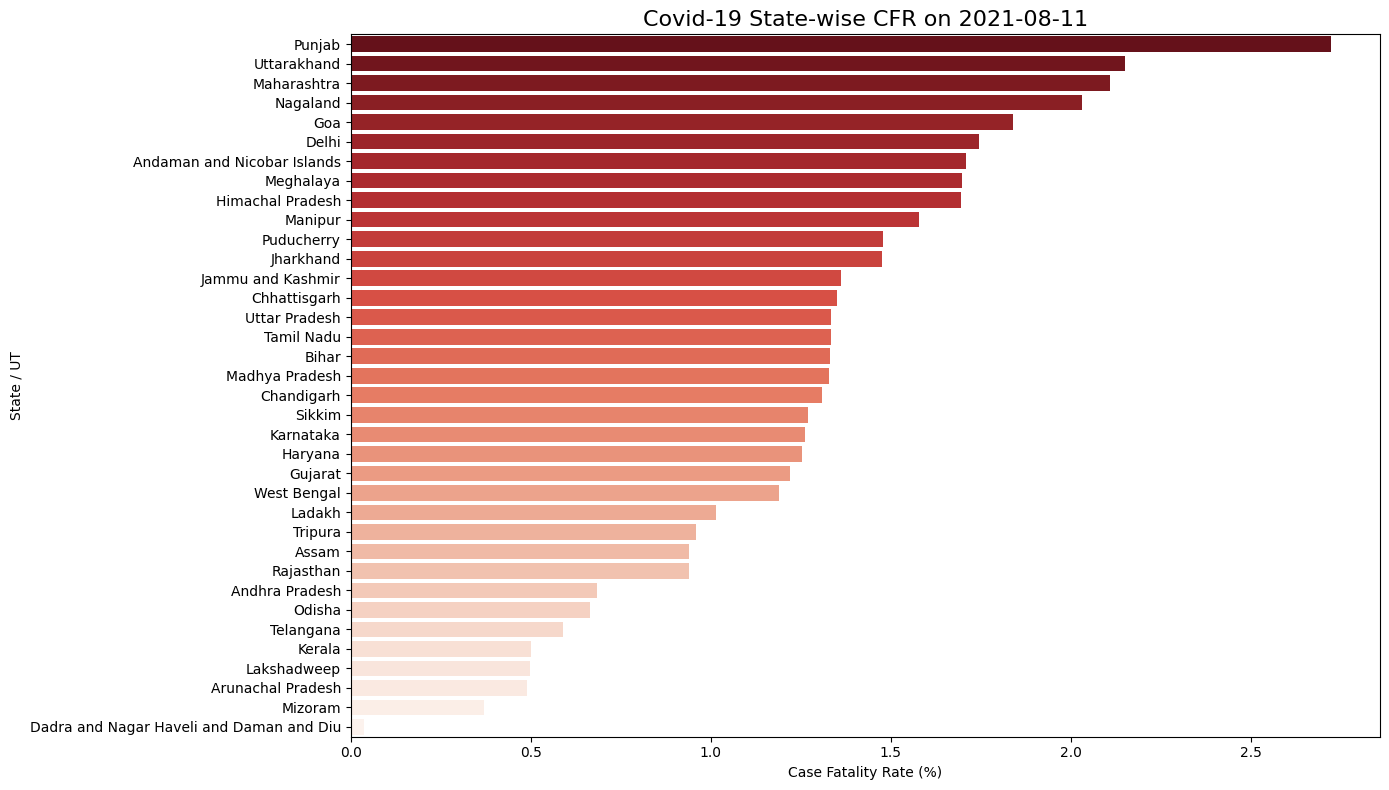

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with CFR & Recovery Rate
df = pd.read_csv("covid_19_india_cleaned_rates.csv")

# Get latest date from dataset
latest_date = df["Date"].max()
latest_data = df[df["Date"] == latest_date]

# Group by State and take the latest CFR
state_cfr = latest_data.groupby("State/UnionTerritory")["CFR"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=state_cfr.values, y=state_cfr.index, palette="Reds_r")
plt.xlabel("Case Fatality Rate (%)")
plt.ylabel("State / UT")
plt.title(f"Covid-19 State-wise CFR on {latest_date}", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5288\1514541549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_rr.values, y=state_rr.index, palette="Greens_r")


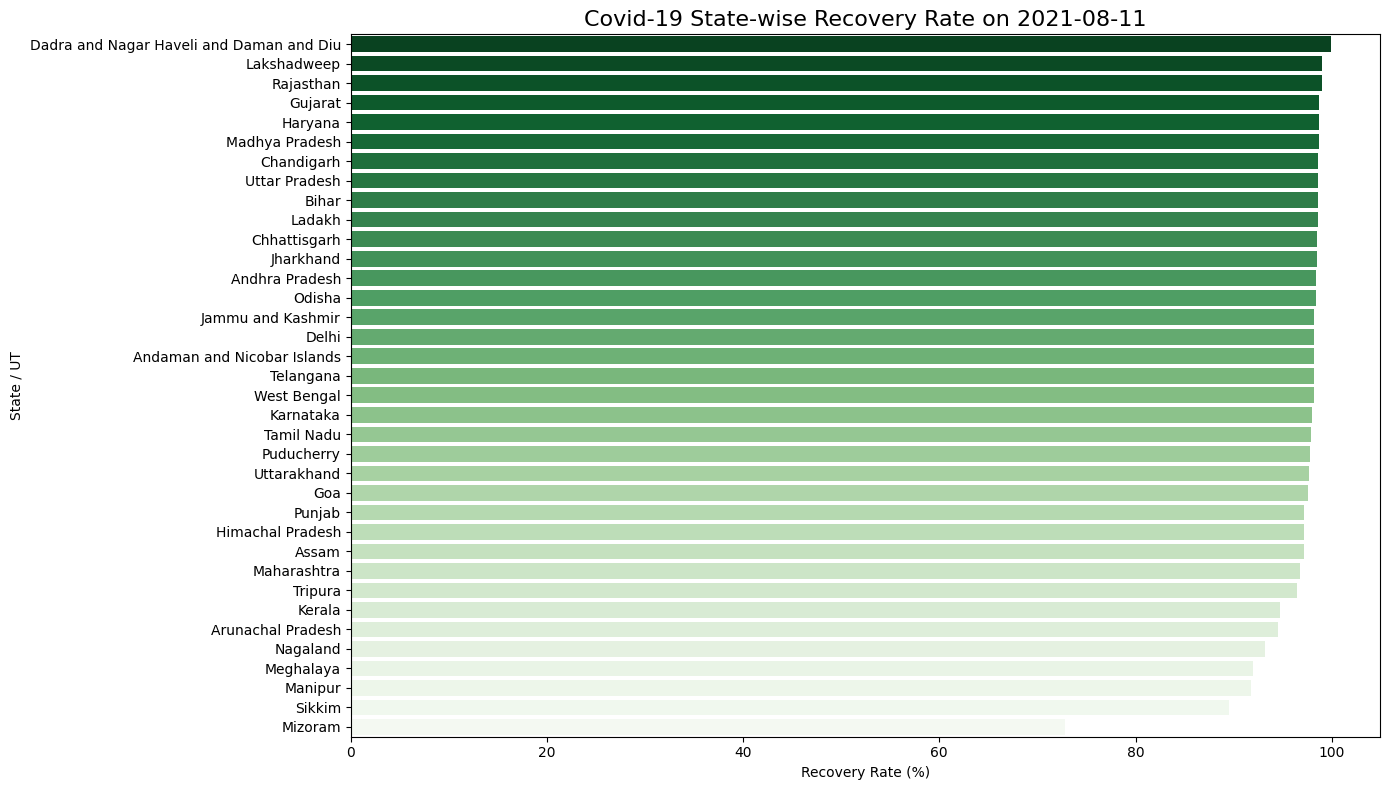

In [31]:
# Group by State and take the latest Recovery Rate
state_rr = latest_data.groupby("State/UnionTerritory")["RecoveryRate"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=state_rr.values, y=state_rr.index, palette="Greens_r")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("State / UT")
plt.title(f"Covid-19 State-wise Recovery Rate on {latest_date}", fontsize=16)
plt.tight_layout()
plt.show()


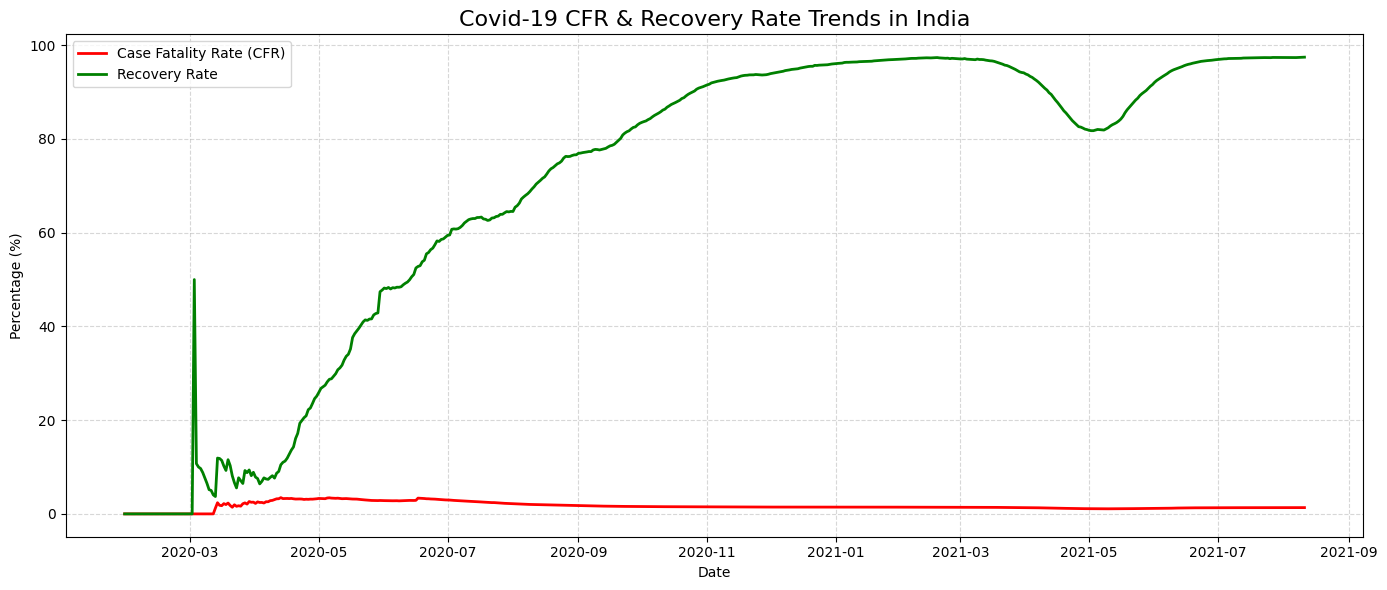

In [32]:
# Calculate national-level CFR & Recovery Rate over time
national_trend = df_clean.groupby("Date").agg({
    "Confirmed": "sum",
    "Cured": "sum",
    "Deaths": "sum"
}).reset_index()

national_trend["CFR"] = (national_trend["Deaths"] / national_trend["Confirmed"]) * 100
national_trend["RecoveryRate"] = (national_trend["Cured"] / national_trend["Confirmed"]) * 100

# Plot
plt.figure(figsize=(14, 6))
plt.plot(national_trend["Date"], national_trend["CFR"], label="Case Fatality Rate (CFR)", color="red", linewidth=2)
plt.plot(national_trend["Date"], national_trend["RecoveryRate"], label="Recovery Rate", color="green", linewidth=2)

plt.title("Covid-19 CFR & Recovery Rate Trends in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


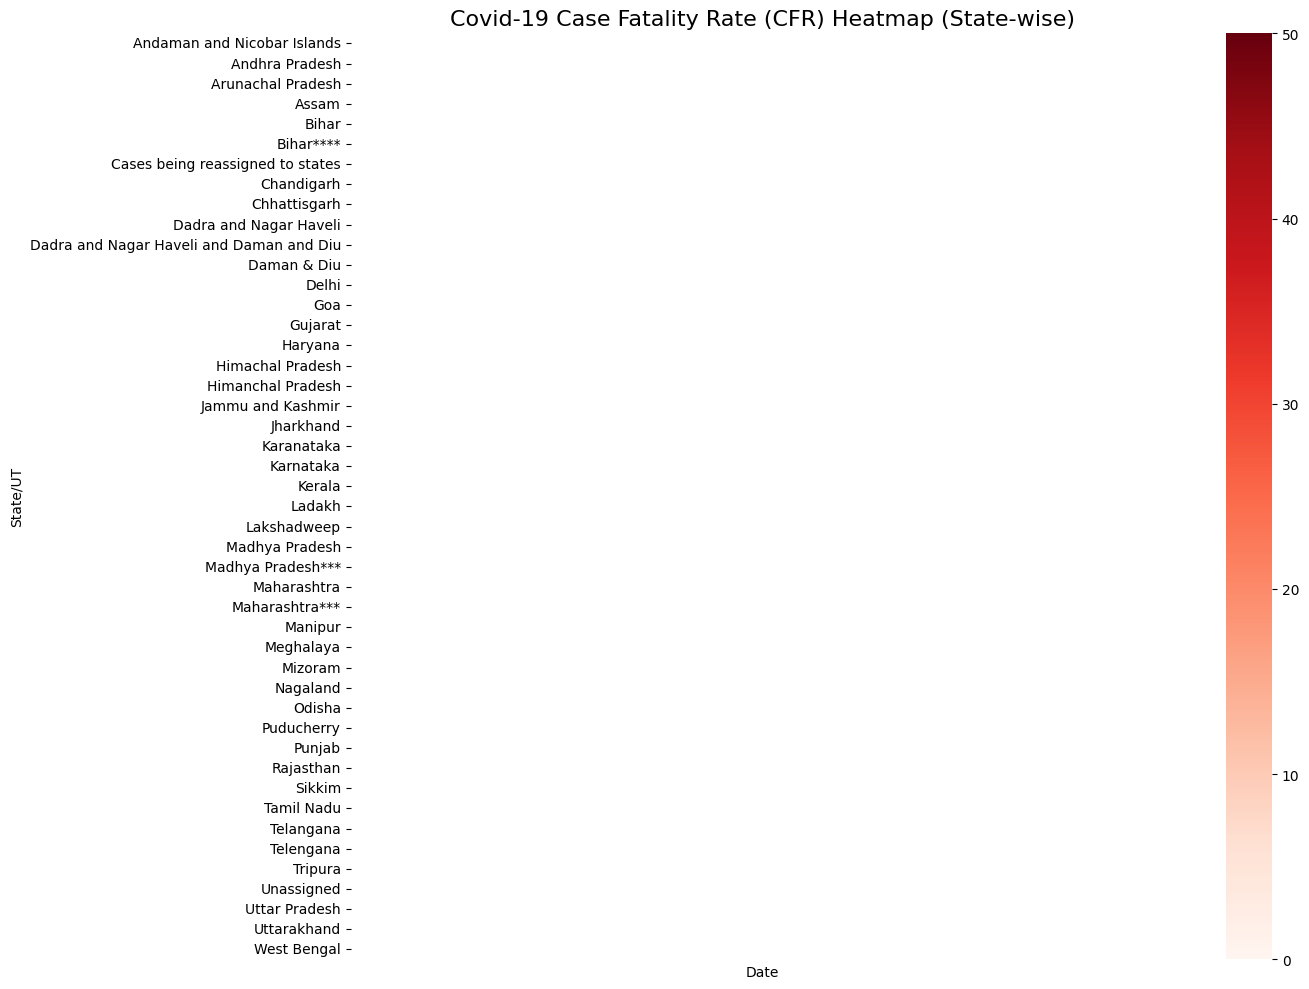

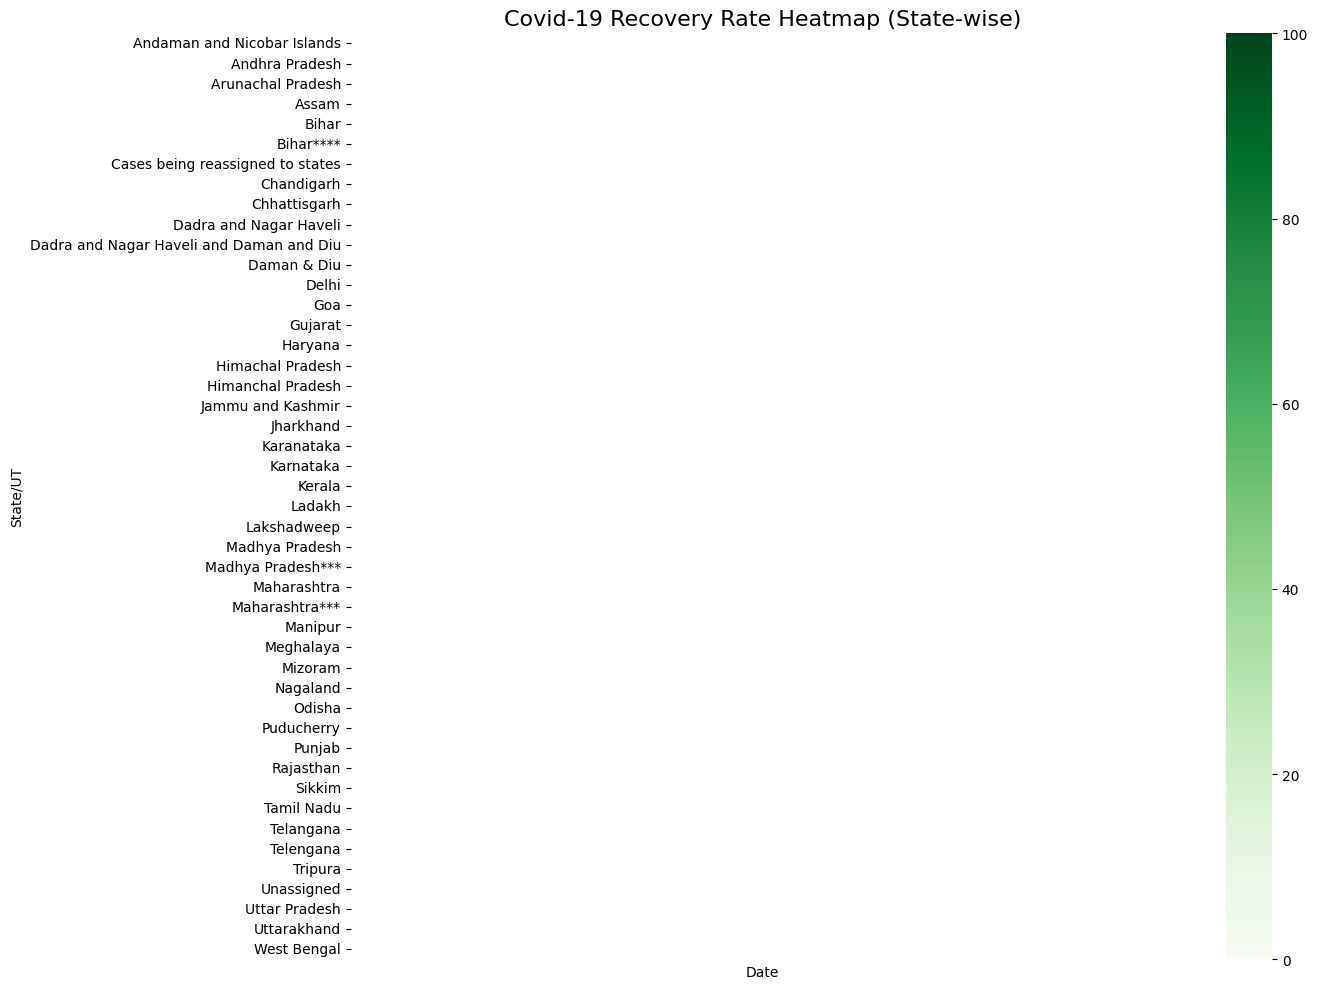

In [33]:
# Reload the cleaned rates file
df_clean = pd.read_csv("covid_19_india_cleaned_rates.csv")

# Convert date to datetime for pivot
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Now make the heatmaps
cfr_pivot = df_clean.pivot_table(index="State/UnionTerritory", columns="Date", values="CFR")
recovery_pivot = df_clean.pivot_table(index="State/UnionTerritory", columns="Date", values="RecoveryRate")

plt.figure(figsize=(14, 10))
sns.heatmap(cfr_pivot, cmap="Reds", linewidths=0.3)
plt.title("Covid-19 Case Fatality Rate (CFR) Heatmap (State-wise)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("State/UT")
plt.xticks([], [])
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(recovery_pivot, cmap="Greens", linewidths=0.3)
plt.title("Covid-19 Recovery Rate Heatmap (State-wise)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("State/UT")
plt.xticks([], [])
plt.tight_layout()
plt.show()


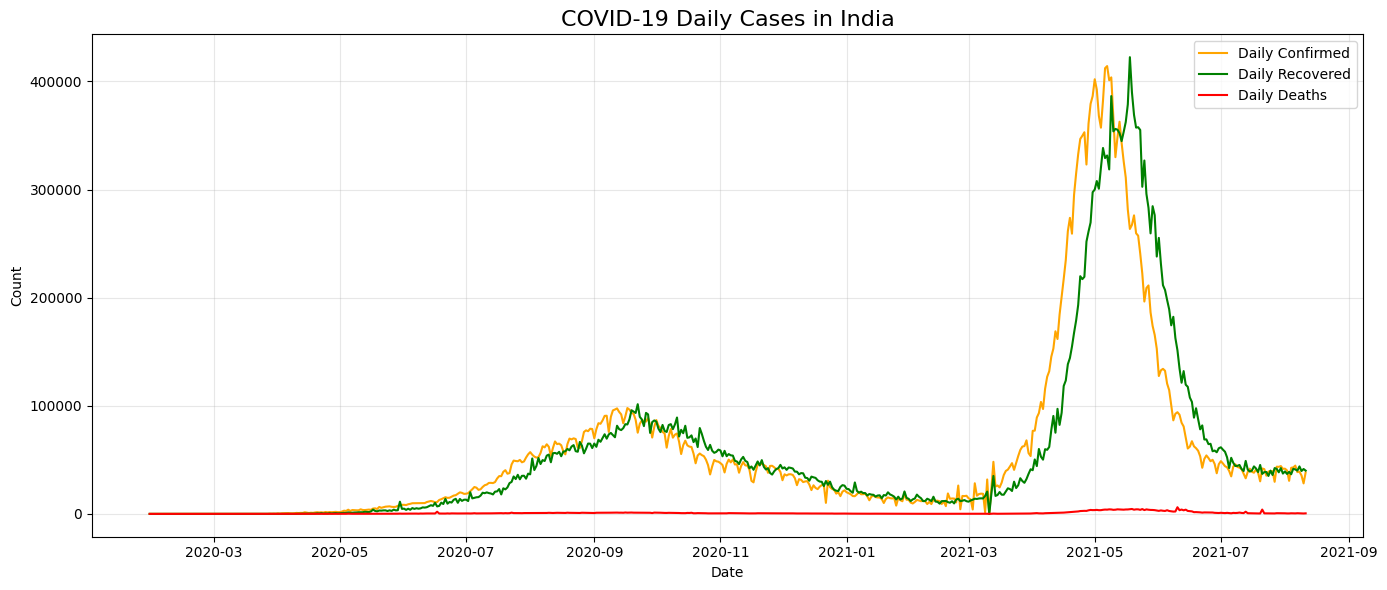

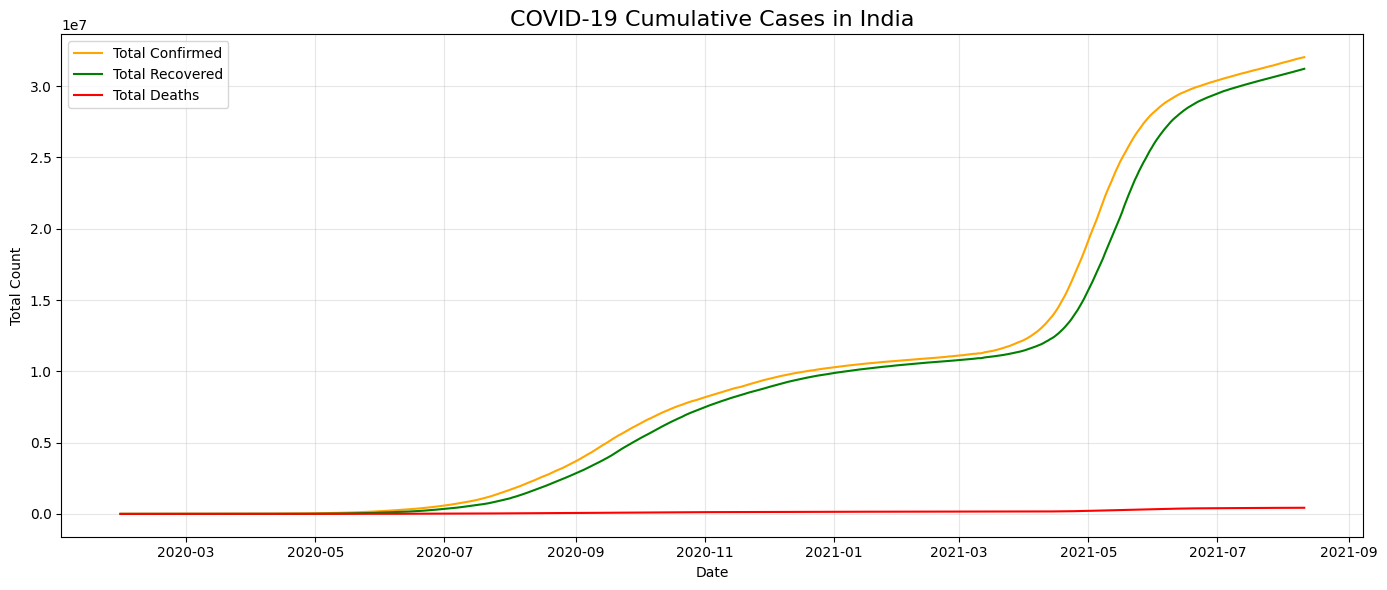

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data with rates
df_clean = pd.read_csv("covid_19_india_cleaned_rates.csv", parse_dates=["Date"])

# Group by date to get India-level daily totals
daily_data = df_clean.groupby("Date")[["Confirmed", "Cured", "Deaths"]].sum().reset_index()

# Calculate daily new cases
daily_data["DailyConfirmed"] = daily_data["Confirmed"].diff().fillna(0)
daily_data["DailyRecovered"] = daily_data["Cured"].diff().fillna(0)
daily_data["DailyDeaths"] = daily_data["Deaths"].diff().fillna(0)


# 1️. Daily Trends Plot

plt.figure(figsize=(14, 6))
plt.plot(daily_data["Date"], daily_data["DailyConfirmed"], label="Daily Confirmed", color="orange")
plt.plot(daily_data["Date"], daily_data["DailyRecovered"], label="Daily Recovered", color="green")
plt.plot(daily_data["Date"], daily_data["DailyDeaths"], label="Daily Deaths", color="red")
plt.title("COVID-19 Daily Cases in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 2️. Cumulative Trends Plot

plt.figure(figsize=(14, 6))
plt.plot(daily_data["Date"], daily_data["Confirmed"], label="Total Confirmed", color="orange")
plt.plot(daily_data["Date"], daily_data["Cured"], label="Total Recovered", color="green")
plt.plot(daily_data["Date"], daily_data["Deaths"], label="Total Deaths", color="red")
plt.title("COVID-19 Cumulative Cases in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


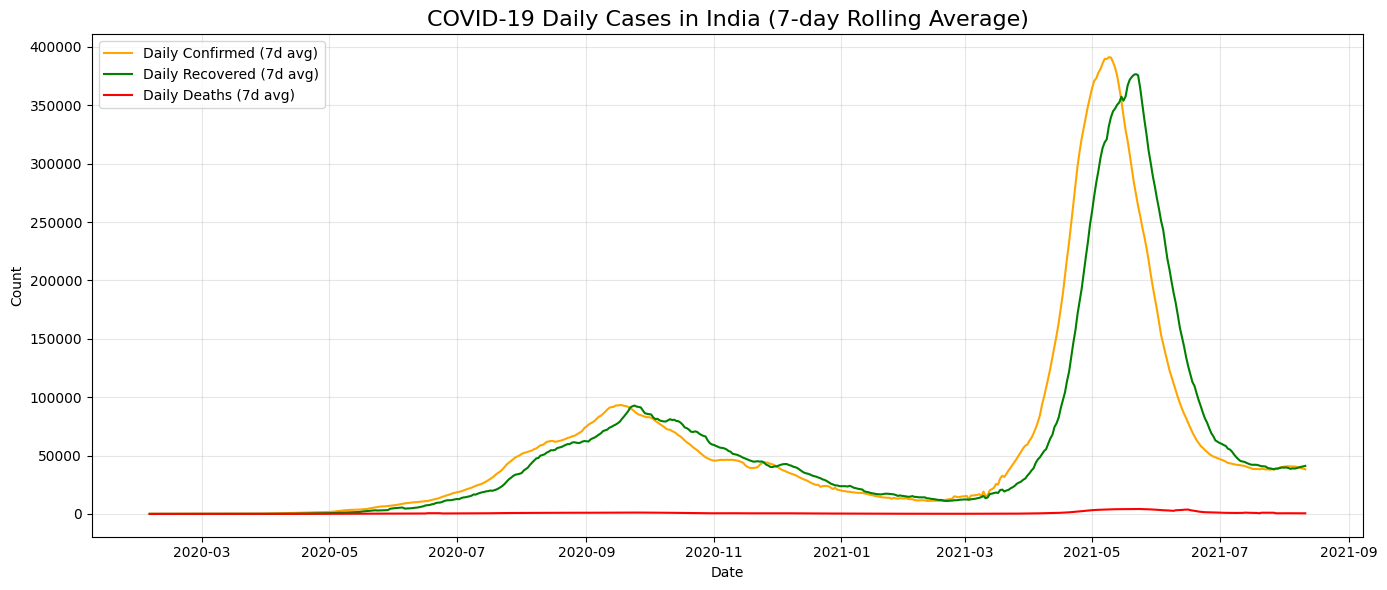

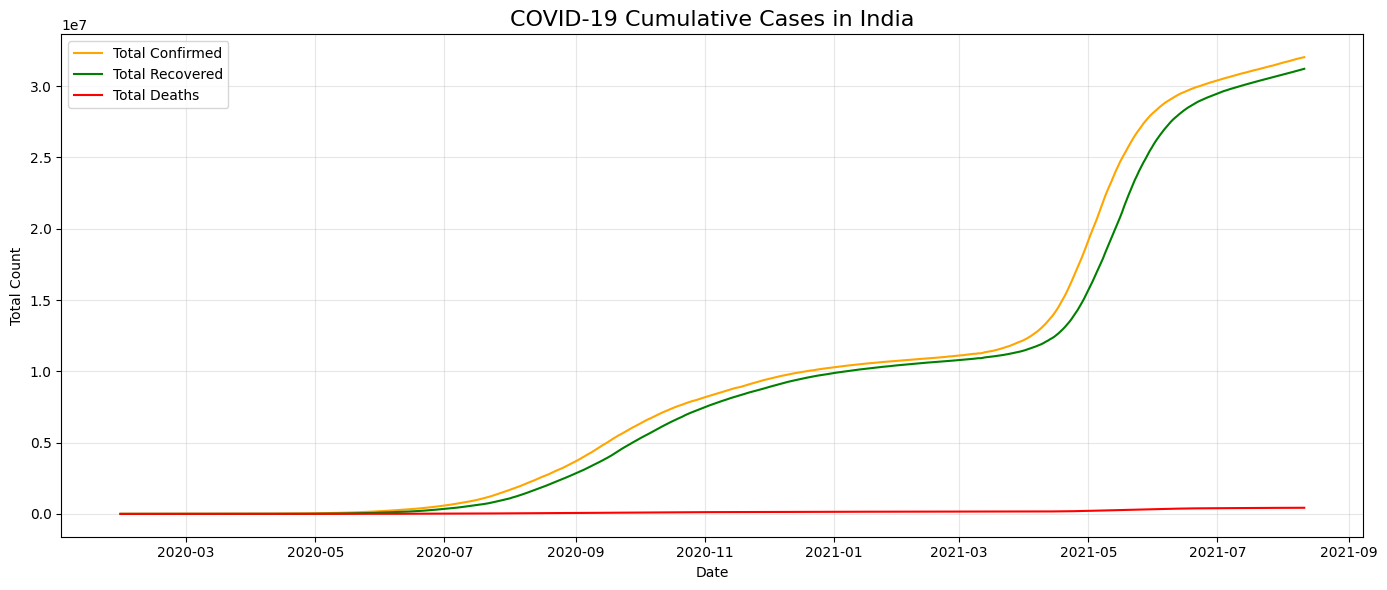

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df_clean = pd.read_csv("covid_19_india_cleaned_rates.csv", parse_dates=["Date"])

# Group by date to get India-level daily totals
daily_data = df_clean.groupby("Date")[["Confirmed", "Cured", "Deaths"]].sum().reset_index()

# Calculate daily new cases
daily_data["DailyConfirmed"] = daily_data["Confirmed"].diff().fillna(0)
daily_data["DailyRecovered"] = daily_data["Cured"].diff().fillna(0)
daily_data["DailyDeaths"] = daily_data["Deaths"].diff().fillna(0)

# Apply 7-day rolling average
daily_data["DailyConfirmed_7d"] = daily_data["DailyConfirmed"].rolling(window=7).mean()
daily_data["DailyRecovered_7d"] = daily_data["DailyRecovered"].rolling(window=7).mean()
daily_data["DailyDeaths_7d"] = daily_data["DailyDeaths"].rolling(window=7).mean()


# 1️. Daily Trends (7-day average)

plt.figure(figsize=(14, 6))
plt.plot(daily_data["Date"], daily_data["DailyConfirmed_7d"], label="Daily Confirmed (7d avg)", color="orange")
plt.plot(daily_data["Date"], daily_data["DailyRecovered_7d"], label="Daily Recovered (7d avg)", color="green")
plt.plot(daily_data["Date"], daily_data["DailyDeaths_7d"], label="Daily Deaths (7d avg)", color="red")
plt.title("COVID-19 Daily Cases in India (7-day Rolling Average)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 2️. Cumulative Trends

plt.figure(figsize=(14, 6))
plt.plot(daily_data["Date"], daily_data["Confirmed"], label="Total Confirmed", color="orange")
plt.plot(daily_data["Date"], daily_data["Cured"], label="Total Recovered", color="green")
plt.plot(daily_data["Date"], daily_data["Deaths"], label="Total Deaths", color="red")
plt.title("COVID-19 Cumulative Cases in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


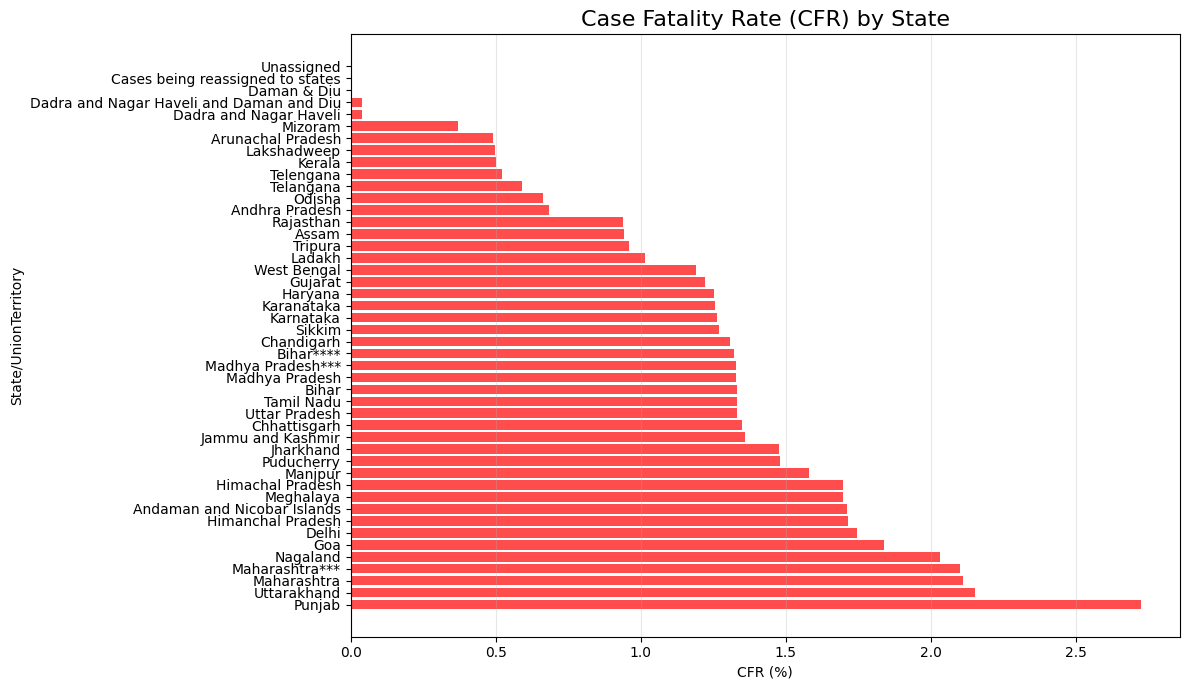

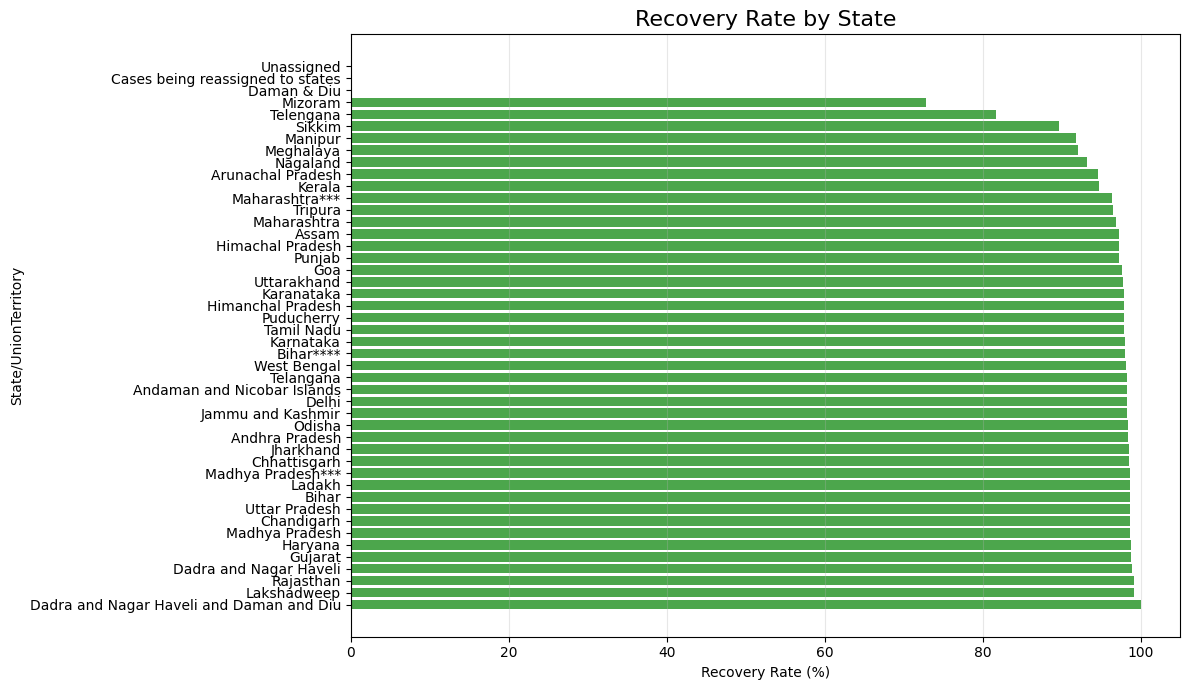

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_clean = pd.read_csv("covid_19_india_cleaned_rates.csv", parse_dates=["Date"])

# Get the latest available data for each state
latest_data = df_clean.sort_values("Date").groupby("State/UnionTerritory").tail(1)

# Sort by CFR for better visualization
latest_data = latest_data.sort_values("CFR", ascending=False)


# 1️. CFR by State

plt.figure(figsize=(12, 7))
plt.barh(latest_data["State/UnionTerritory"], latest_data["CFR"], color="red", alpha=0.7)
plt.title("Case Fatality Rate (CFR) by State", fontsize=16)
plt.xlabel("CFR (%)")
plt.ylabel("State/UnionTerritory")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


# 2️. Recovery Rate by State

latest_data = latest_data.sort_values("RecoveryRate", ascending=False)

plt.figure(figsize=(12, 7))
plt.barh(latest_data["State/UnionTerritory"], latest_data["RecoveryRate"], color="green", alpha=0.7)
plt.title("Recovery Rate by State", fontsize=16)
plt.xlabel("Recovery Rate (%)")
plt.ylabel("State/UnionTerritory")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


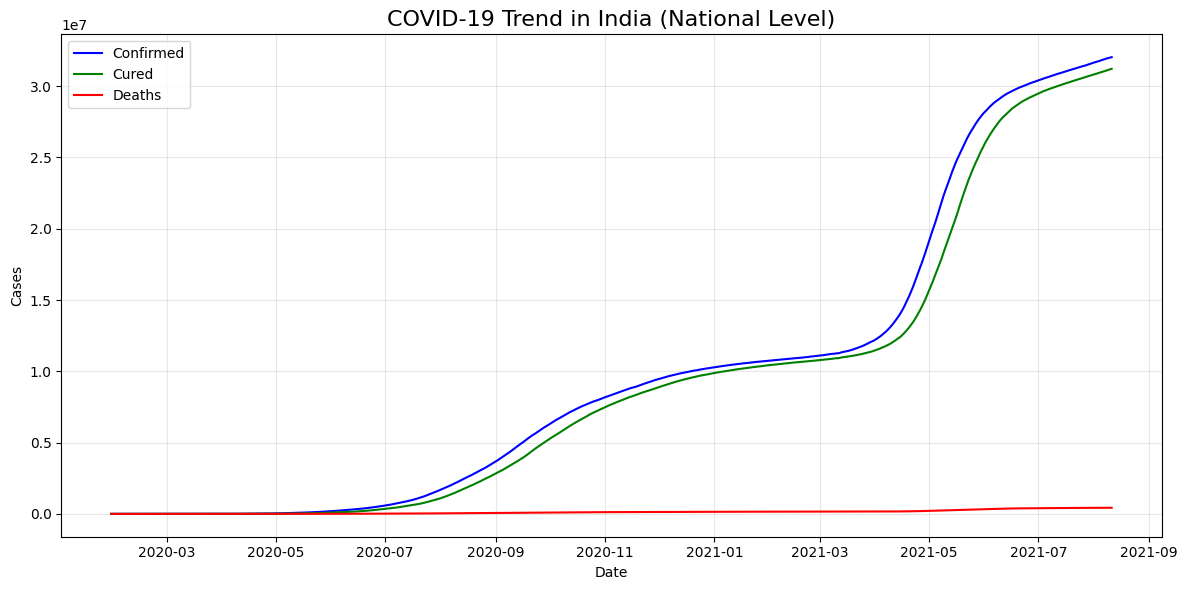

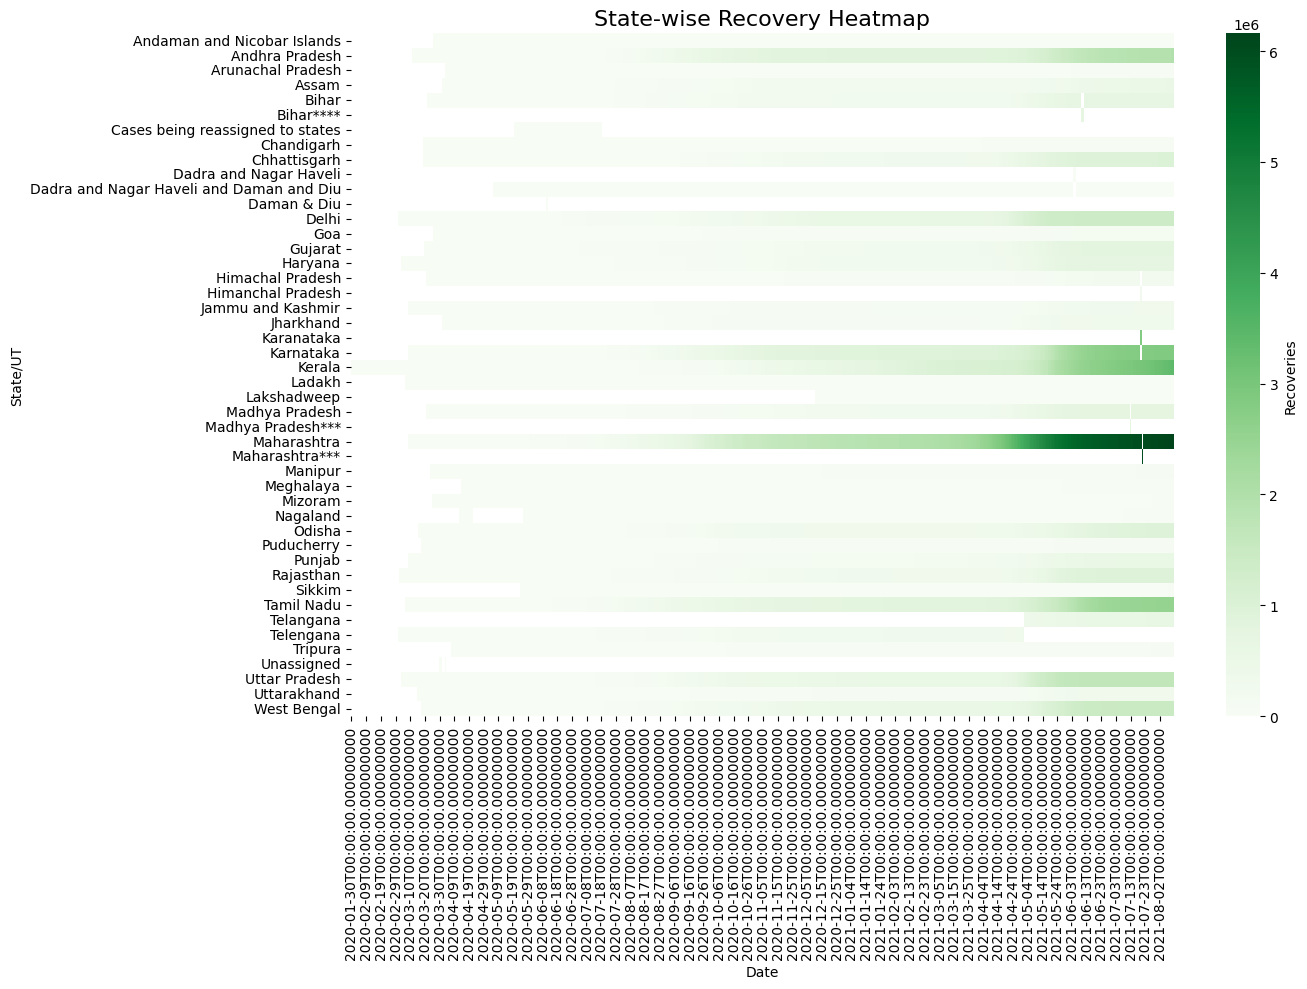

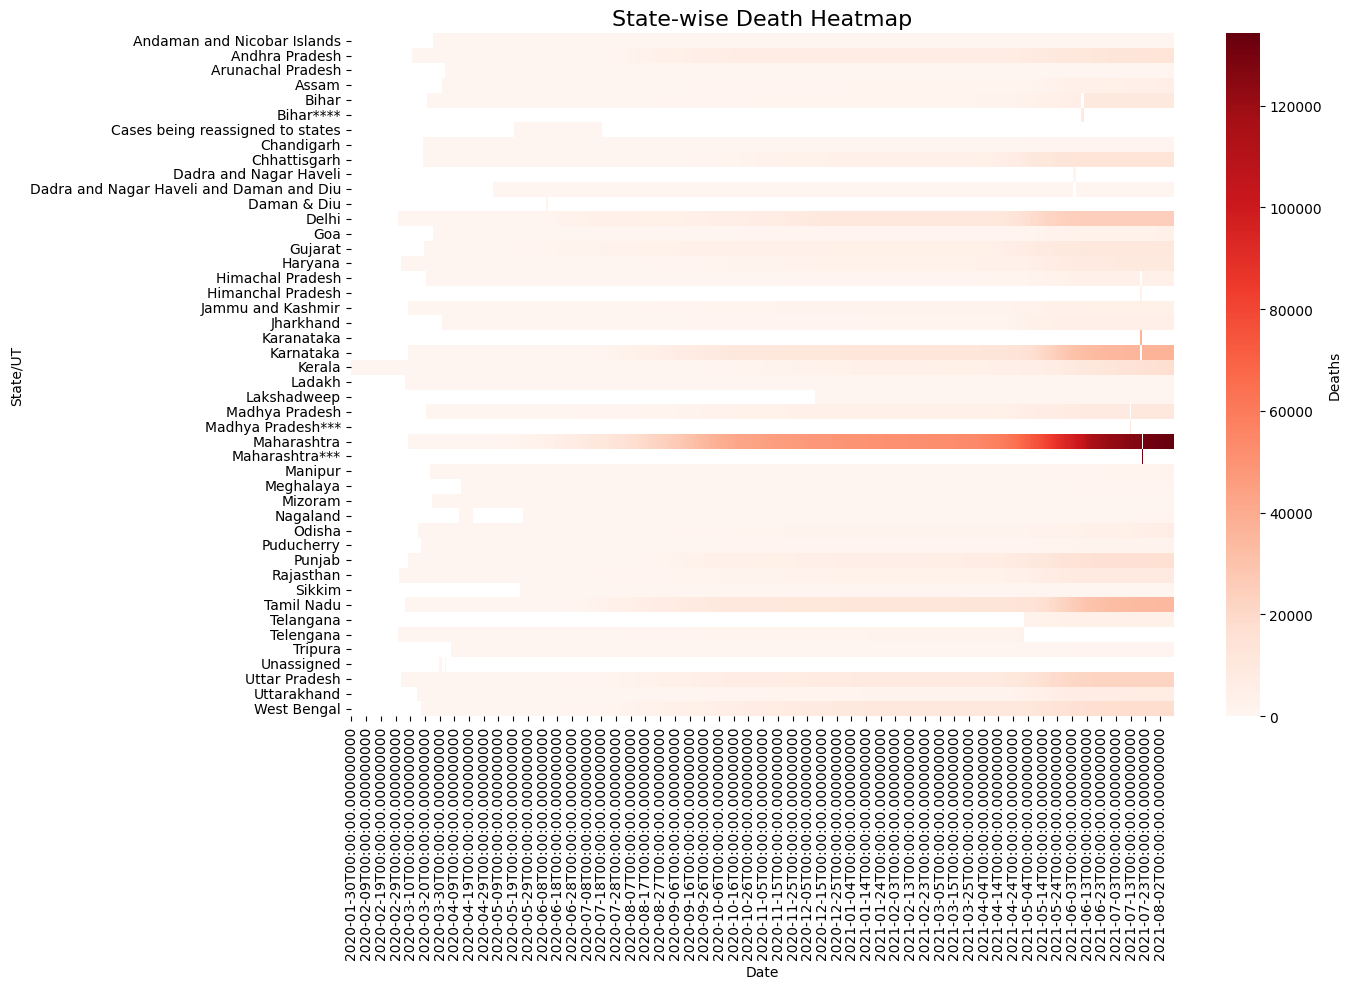

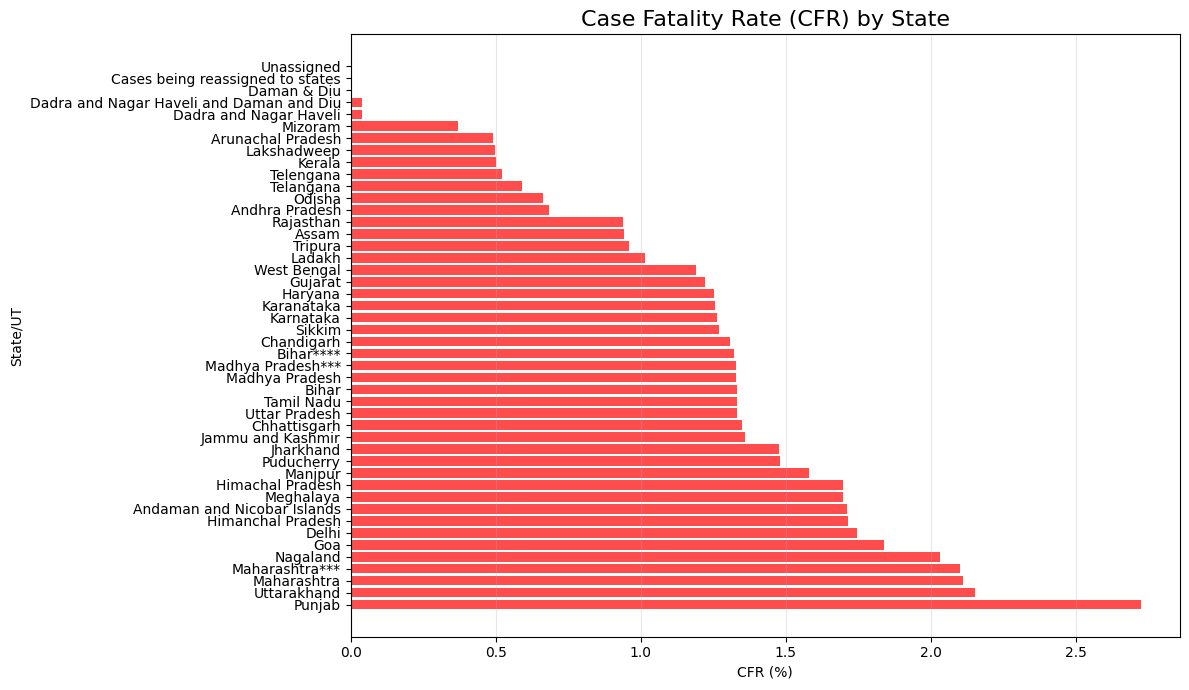

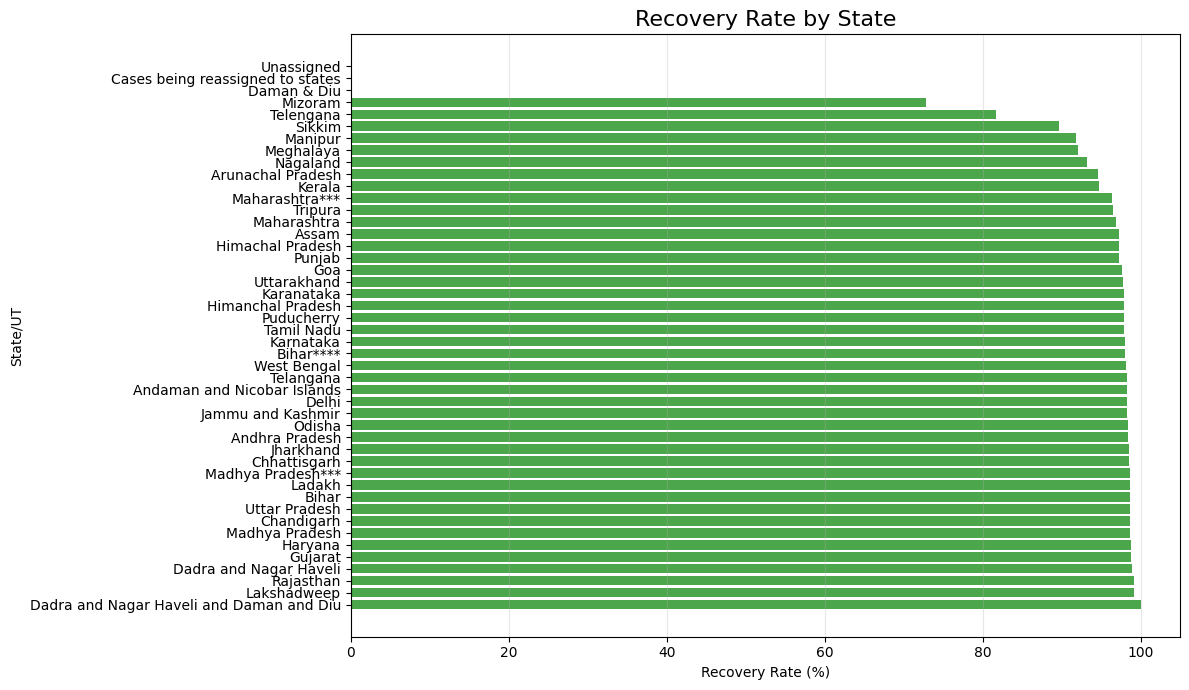

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df_clean = pd.read_csv("covid_19_india_cleaned_rates.csv", parse_dates=["Date"])


# 1️.Trend of Confirmed, Cured, Deaths over time

df_trend = df_clean.groupby("Date")[["Confirmed", "Cured", "Deaths"]].sum()

plt.figure(figsize=(12, 6))
for col, color in zip(["Confirmed", "Cured", "Deaths"], ["blue", "green", "red"]):
    plt.plot(df_trend.index, df_trend[col], label=col, color=color)

plt.title("COVID-19 Trend in India (National Level)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 2️. Heatmap: Recovery by State

recovery_pivot = df_clean.pivot_table(
    index="State/UnionTerritory", columns="Date", values="Cured", aggfunc="max"
)
plt.figure(figsize=(14, 10))
sns.heatmap(recovery_pivot, cmap="Greens", cbar_kws={'label': 'Recoveries'})
plt.title("State-wise Recovery Heatmap", fontsize=16)
plt.xlabel("Date")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


# 3️. Heatmap: Deaths by State

deaths_pivot = df_clean.pivot_table(
    index="State/UnionTerritory", columns="Date", values="Deaths", aggfunc="max"
)
plt.figure(figsize=(14, 10))
sns.heatmap(deaths_pivot, cmap="Reds", cbar_kws={'label': 'Deaths'})
plt.title("State-wise Death Heatmap", fontsize=16)
plt.xlabel("Date")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


# 4️. State-wise CFR and Recovery Rate (Latest Data)

latest_data = df_clean.sort_values("Date").groupby("State/UnionTerritory").tail(1)

# CFR plot
plt.figure(figsize=(12, 7))
latest_data = latest_data.sort_values("CFR", ascending=False)
plt.barh(latest_data["State/UnionTerritory"], latest_data["CFR"], color="red", alpha=0.7)
plt.title("Case Fatality Rate (CFR) by State", fontsize=16)
plt.xlabel("CFR (%)")
plt.ylabel("State/UT")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# Recovery Rate plot
plt.figure(figsize=(12, 7))
latest_data = latest_data.sort_values("RecoveryRate", ascending=False)
plt.barh(latest_data["State/UnionTerritory"], latest_data["RecoveryRate"], color="green", alpha=0.7)
plt.title("Recovery Rate by State", fontsize=16)
plt.xlabel("Recovery Rate (%)")
plt.ylabel("State/UT")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()
